In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


def error_corrector(array, error_list):
    for i in range(len(error_list)):
        array[error_list[i]] = (array[error_list[i]-1] + array[error_list[i]+1]) / 2
    return array

    

In [3]:
synth_data = np.load(Path.home()/'group'/'project'/'datasets'/'data'/'230119_cleaned_phase_errors.npy')
jugaad_data = np.load(Path.home()/'group'/'project'/'datasets'/'data'/'230119_cleaned_phase_errors_single_freq.npy')


In [4]:
sns.set_theme(context='talk', style='whitegrid',font_scale=1.2)
clist = sns.color_palette('deep')


# examine synthetic array phase errors, remove delta errors

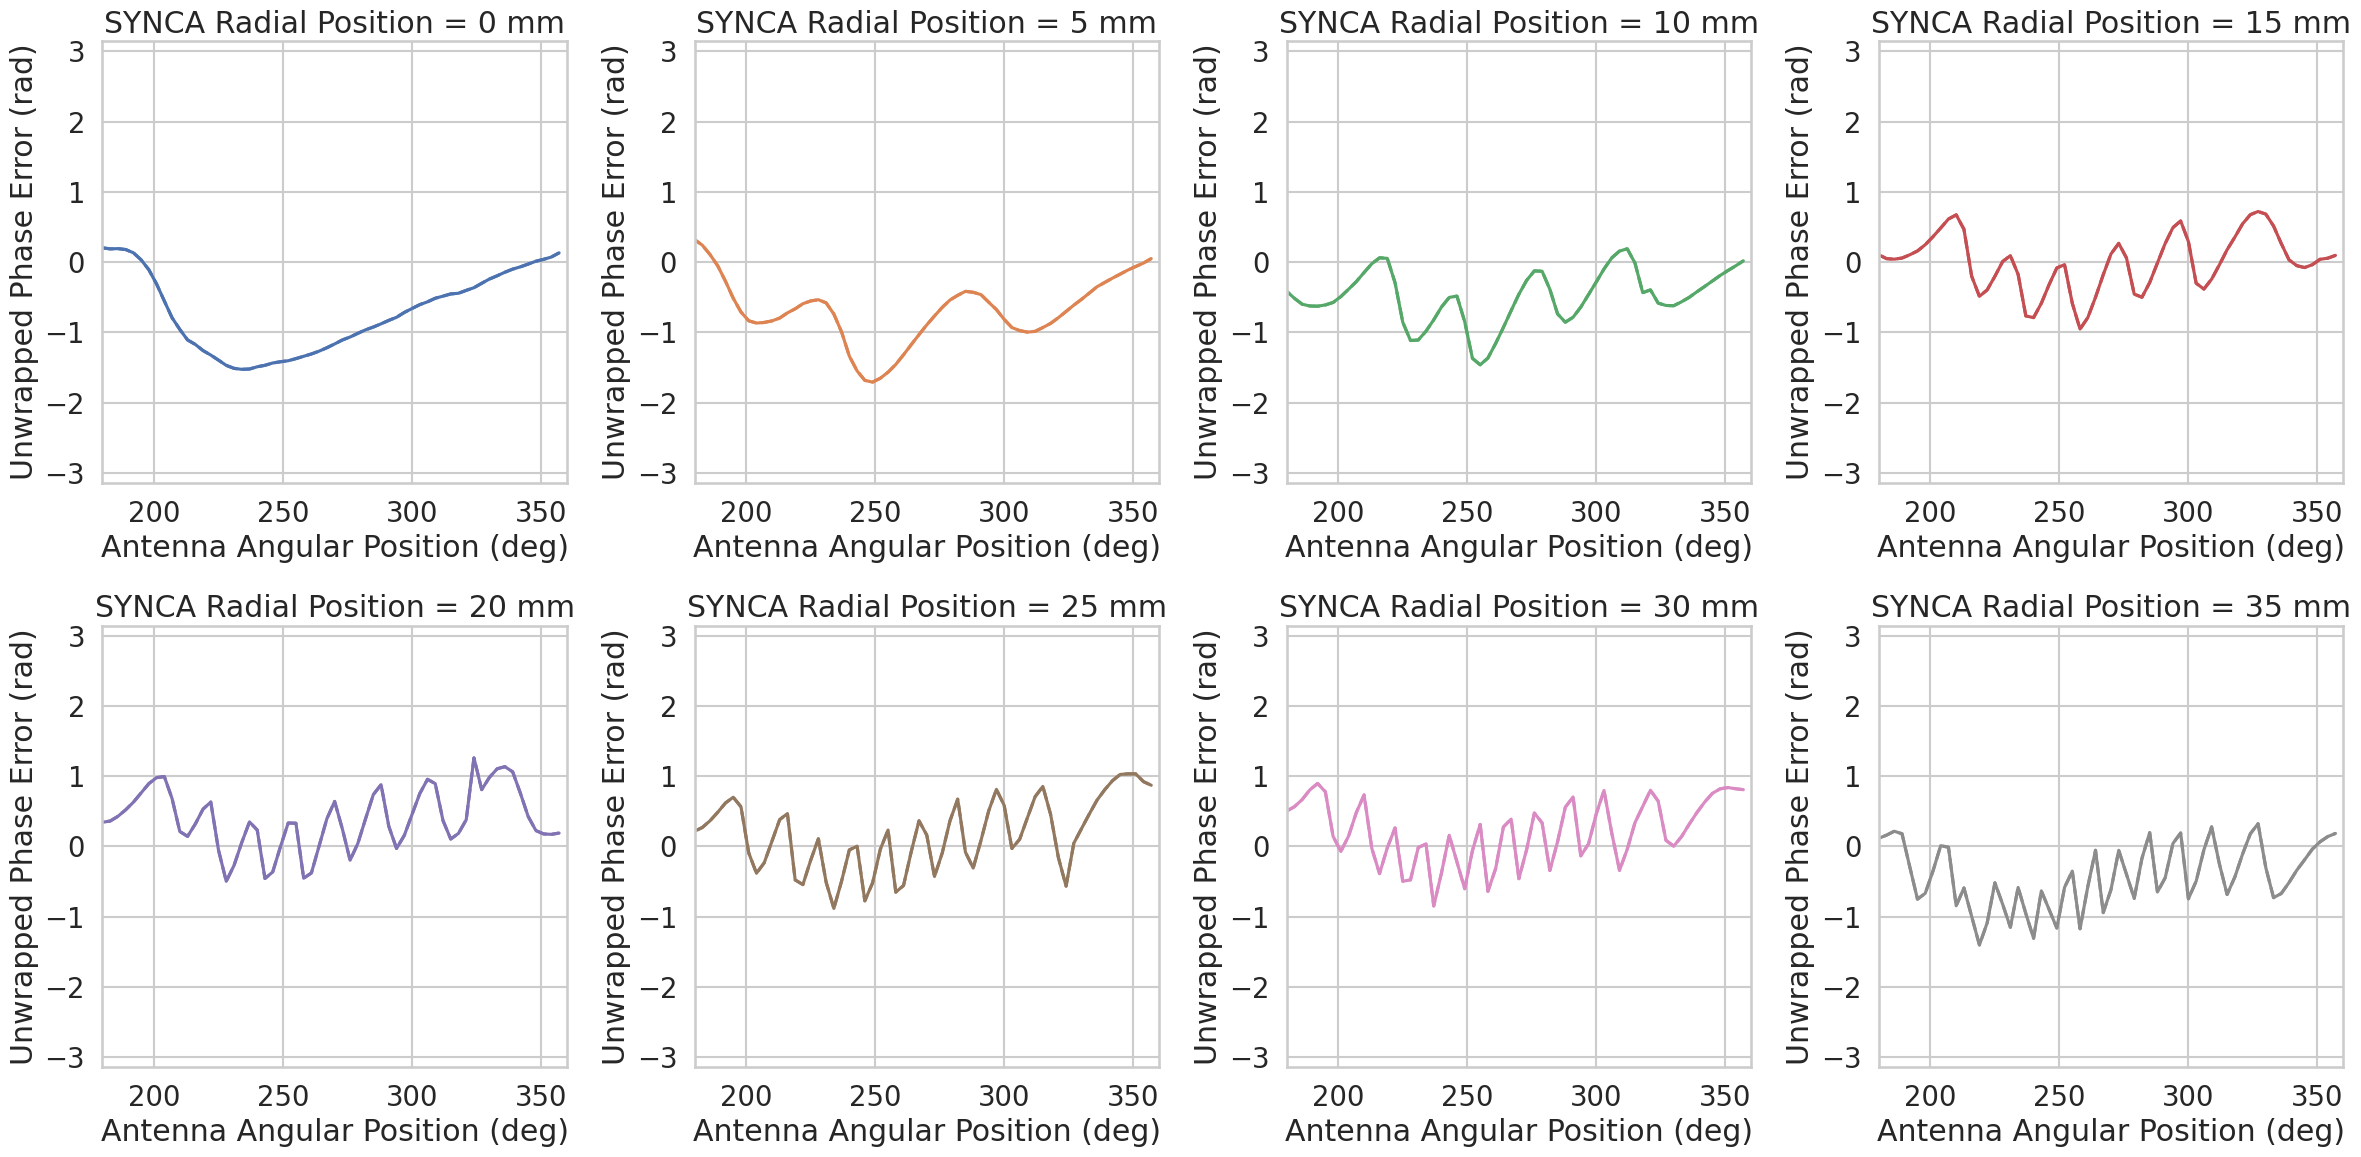

In [5]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

rng = np.random.default_rng()


for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    for i_rad in radial_inds:

        axs[i_rad].plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,np.arange(0,120,1)],
            color=clist[i_rad],
            marker='None',
            ls='-',
        )
        
        #example_phase_noise = rng.uniform(low=-np.pi, high=np.pi, size=120)
        
        axs[i_rad].plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,np.arange(0,120,1)],
            color=clist[i_rad],
            marker='None',
            ls='--',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_xlim(180,360)
        axs[i_rad].set_ylim(-np.pi,np.pi)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


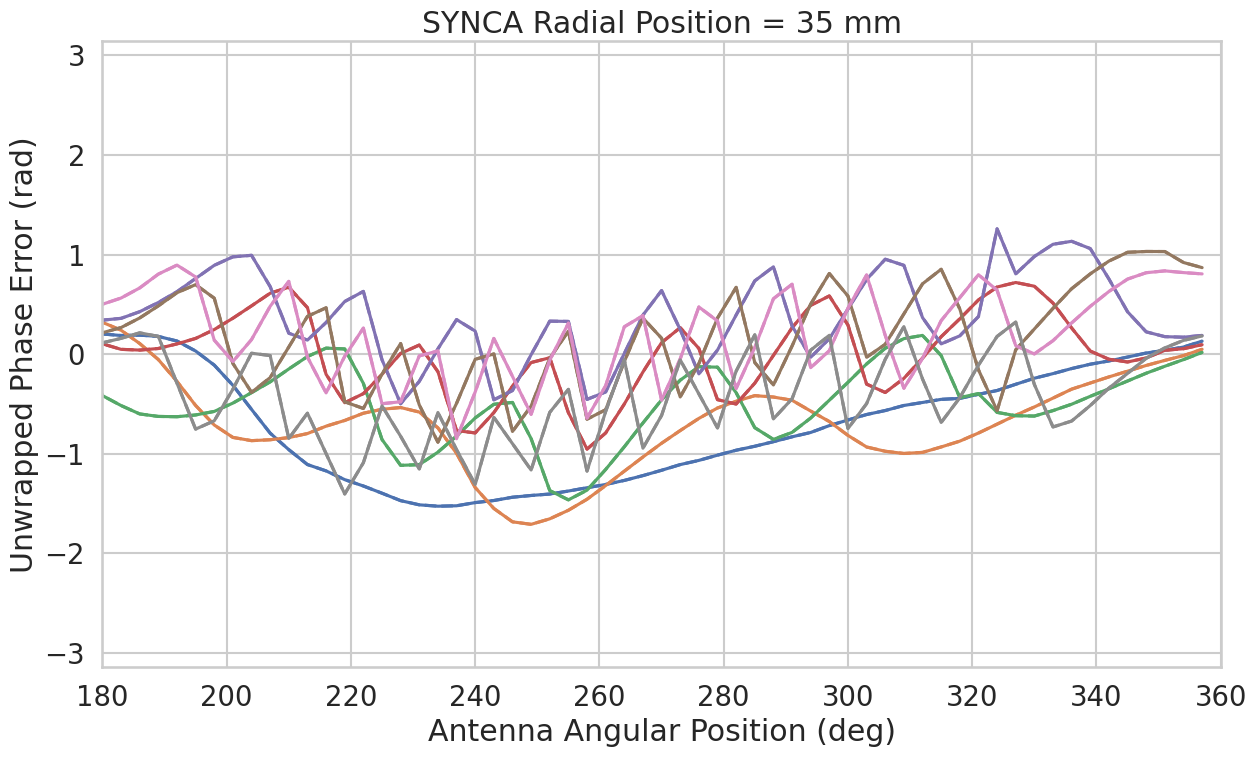

In [6]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

rng = np.random.default_rng()


for i_ax in axial_inds:
    #fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    #axs=axs.flatten()
    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    fig = plt.figure(figsize=(13,8))
    ax=fig.add_subplot(1,1,1)
    for i_rad in radial_inds:

        ax.plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,np.arange(0,120,1)],
            color=clist[i_rad],
            marker='None',
            ls='-',
        )
        
        #example_phase_noise = rng.uniform(low=-np.pi, high=np.pi, size=120)
        
        ax.plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,np.arange(0,120,1)],
            color=clist[i_rad],
            marker='None',
            ls='--',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        ax.set_xlim(180,360)
        ax.set_ylim(-np.pi,np.pi)
        ax.set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        ax.set_xlabel('Antenna Angular Position (deg)')
        ax.set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

In [7]:
synth_error_dict = {
    0:{
        0:[57],1:[],2:[],3:[],4:[108],5:[],6:[4],7:[10]
    },
    1:{
        0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]
    },
}

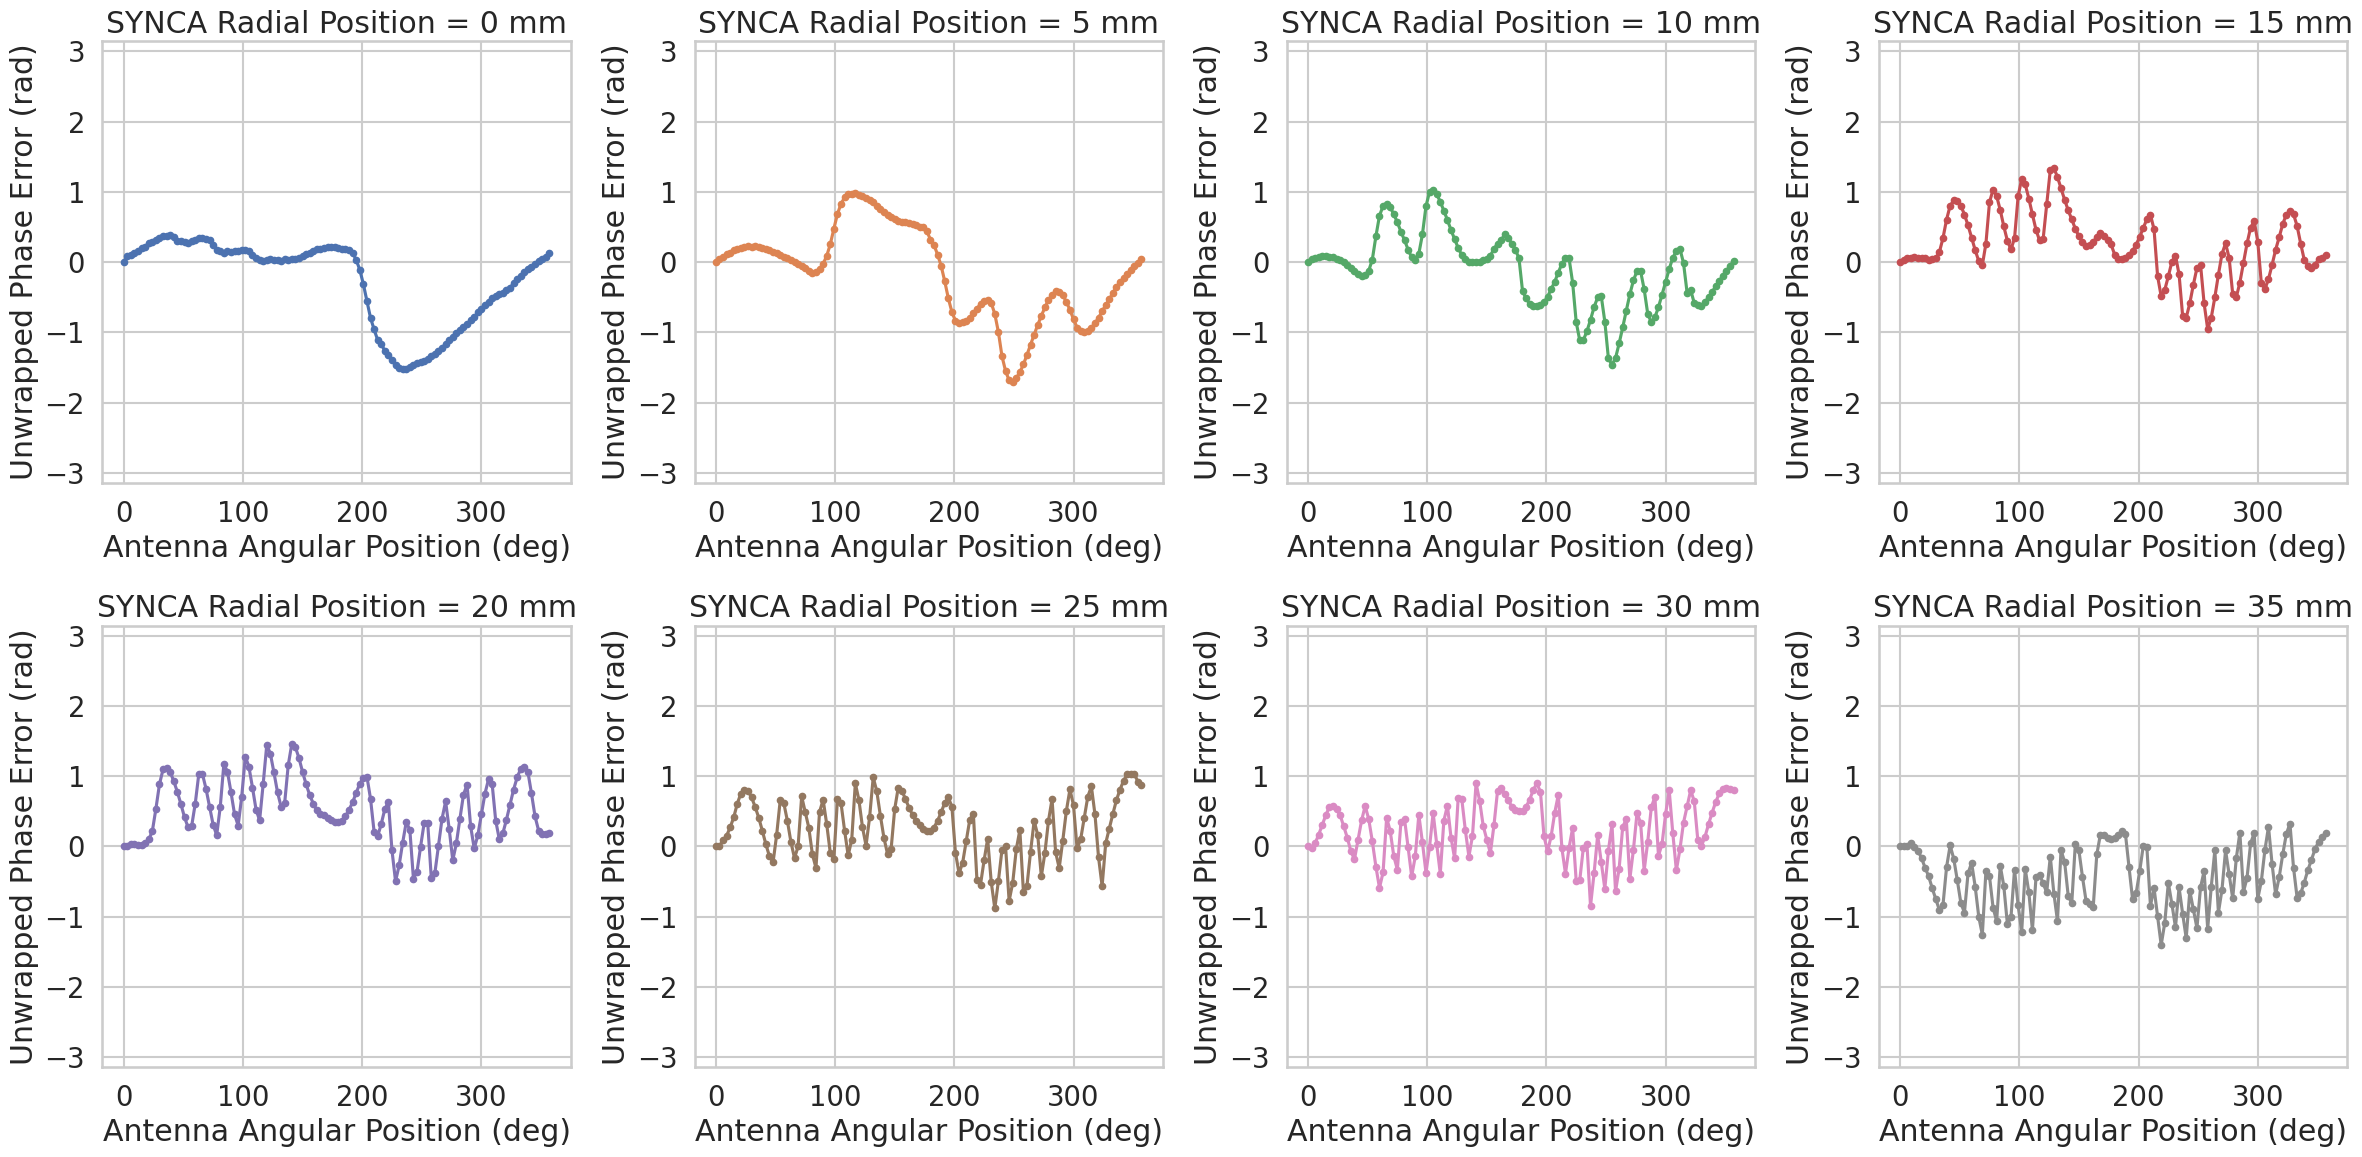

In [8]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    for i_rad in radial_inds:

        corrected_data = error_corrector(synth_data[i_ax,i_rad, :],  synth_error_dict[i_ax][i_rad])
        axs[i_rad].plot(
            np.arange(0,360,3),
            corrected_data,
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        #axs[i_rad].set_xlim(300,360)
        axs[i_rad].set_ylim(-np.pi, np.pi)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

# examine rms gradient

4.52252239140394
7.904688559327683
13.267380049852447
18.026108486152435
22.797329389808176
27.179114150487123
27.162351682134478
28.109838224150874


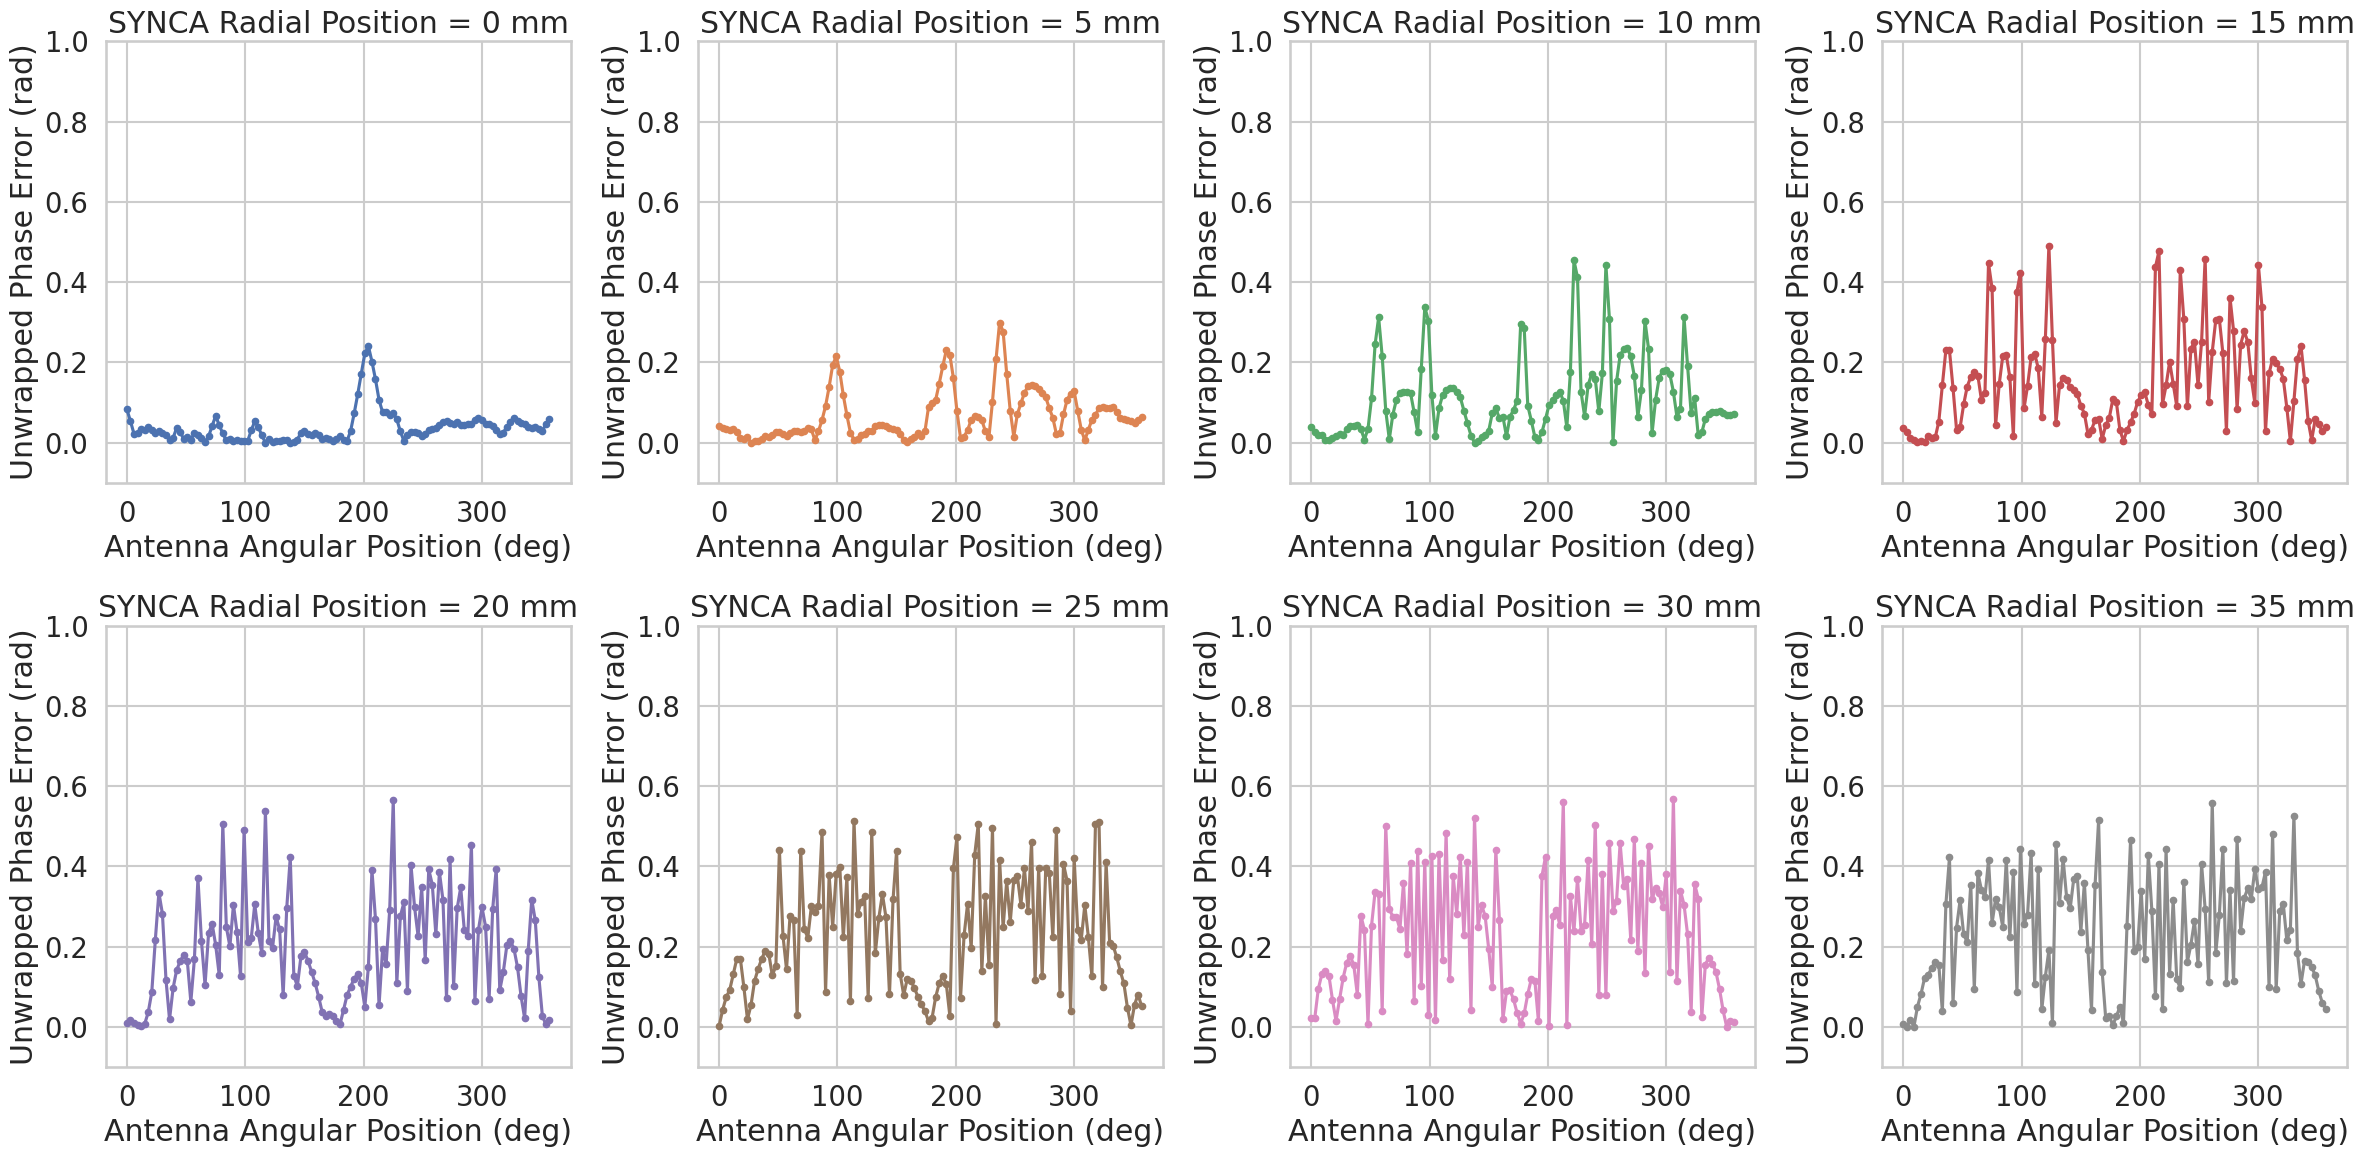

In [9]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    for i_rad in radial_inds:

        corrected_data = error_corrector(synth_data[i_ax,i_rad, :],  synth_error_dict[i_ax][i_rad])
        axs[i_rad].plot(
            np.arange(0,360,3),
            np.sqrt(np.gradient(corrected_data) ** 2),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        print(np.trapz(np.sqrt(np.gradient(corrected_data) ** 2)))
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        #axs[i_rad].set_xlim(300,360)
        axs[i_rad].set_ylim(-0.1, 1)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

# plot transform of corrected data

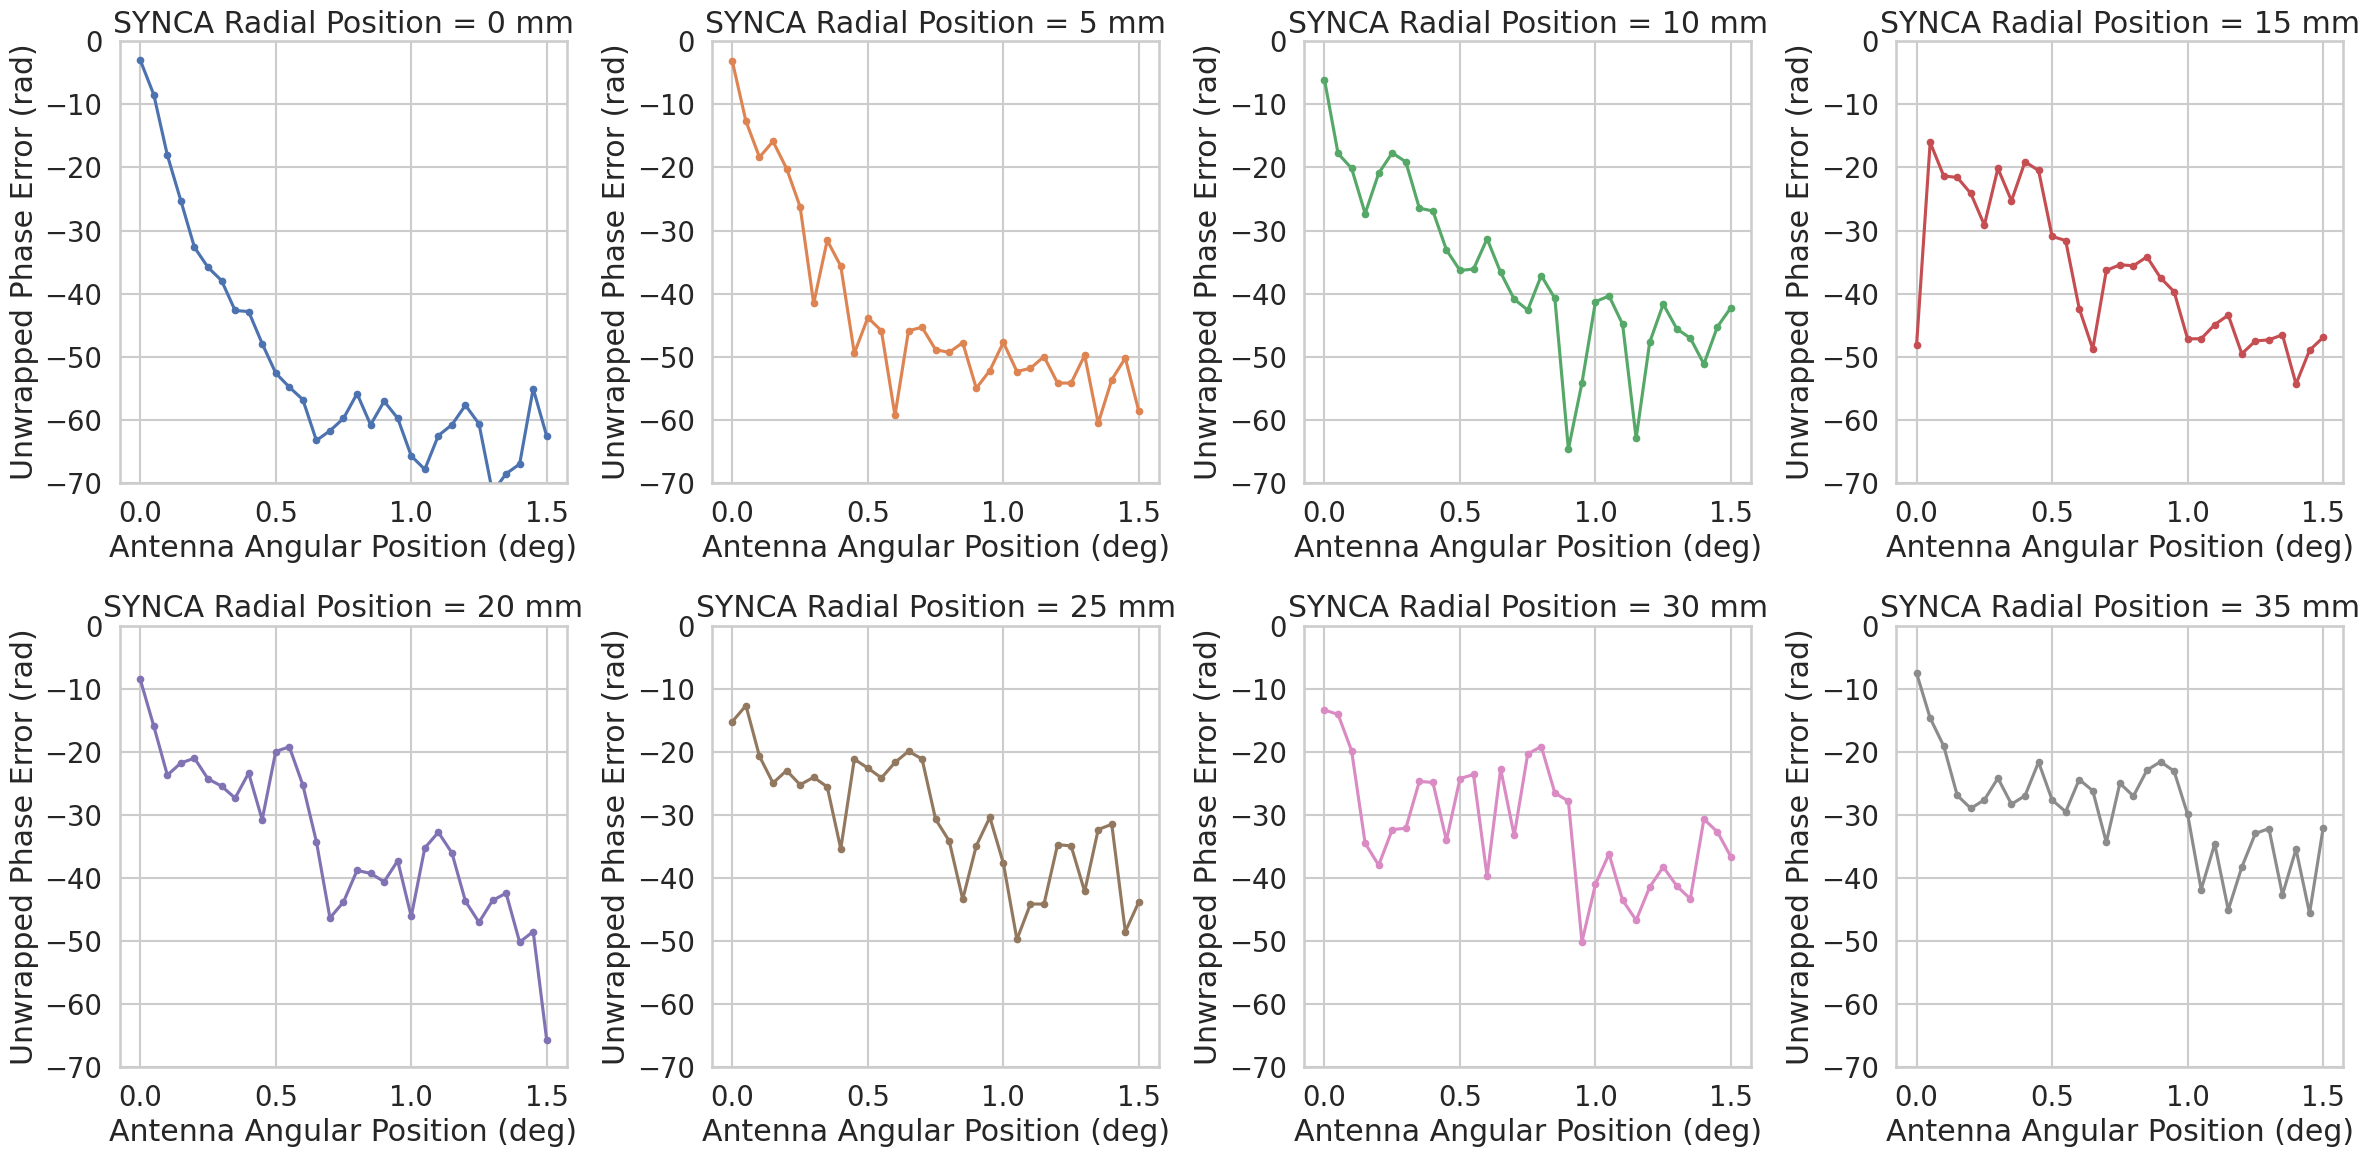

In [10]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    for i_rad in radial_inds:
        
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        axs[i_rad].plot(
            np.fft.rfftfreq(60, 1/3),
            10*np.log10(abs(np.fft.rfft(corrected_data[60:], norm='forward'))**2),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.fft.rfftfreq(60, 1/6),
        #    10*np.log10(abs(np.fft.rfft(corrected_data[np.arange(0,120,2)], norm='forward'))**2),
        #    color=clist[i_rad],
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #)
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-70, 0)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# smooth transform, plot all radii on the same axis

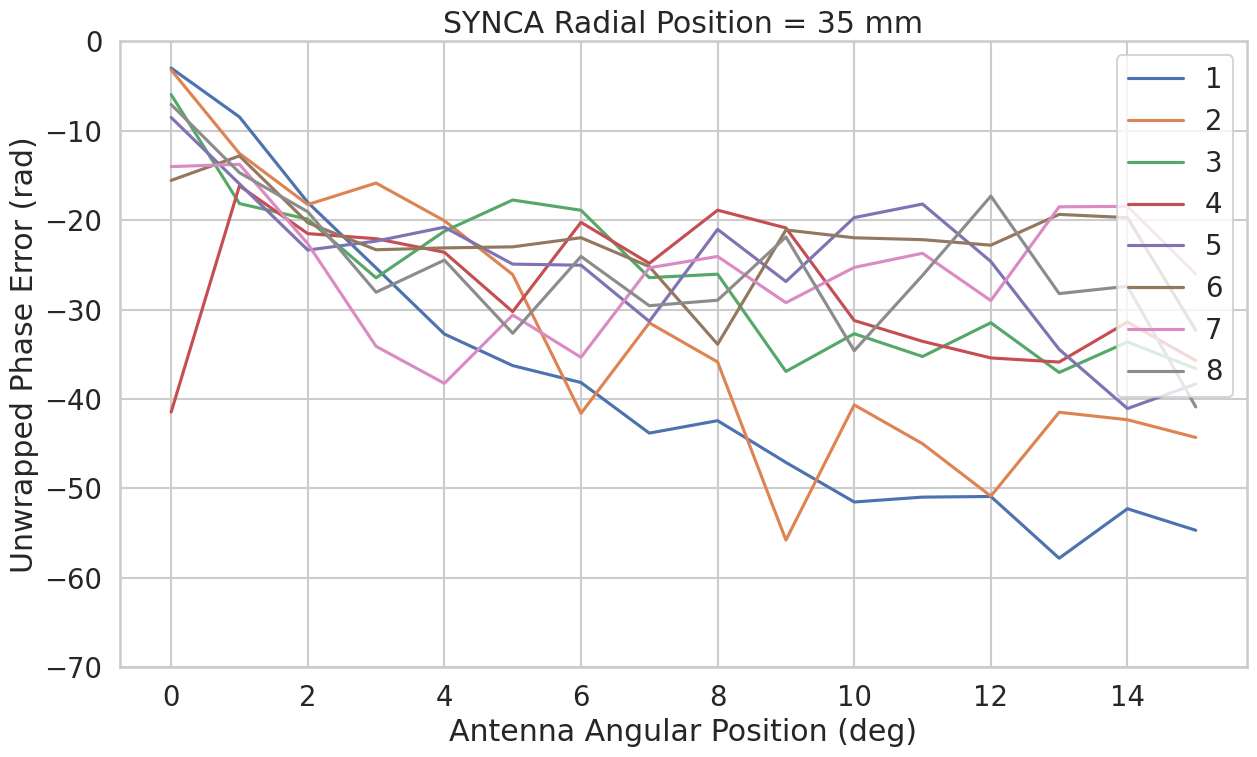

In [11]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)

    #fig,axs = plt.subplots(1,1,sharex=False,sharey=False, figsize=(24, 12))
    for i_rad in radial_inds:
        
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,:], synth_error_dict[i_ax][i_rad])
        transform = 10*np.log10(abs(np.fft.rfft(corrected_data[np.arange(0,120,2)][30:], norm='forward'))**2)
        smoothed_transform = np.convolve(transform, np.ones(1)/1, mode='valid')
        ax.plot(
            smoothed_transform,
            color=clist[i_rad],
            marker='None',
            ls='-',
            label = f'{i_rad+1}'
        )
        ax.legend(loc=1)
        ax.set_ylim(-70, 0)
        ax.set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        ax.set_xlabel('Antenna Angular Position (deg)')
        ax.set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


0.0
5.339678979533684
605.5180301180696
719.0170437562837
839.8920035683818
1043.299358286183
1037.6746792360925
1168.5012482982515


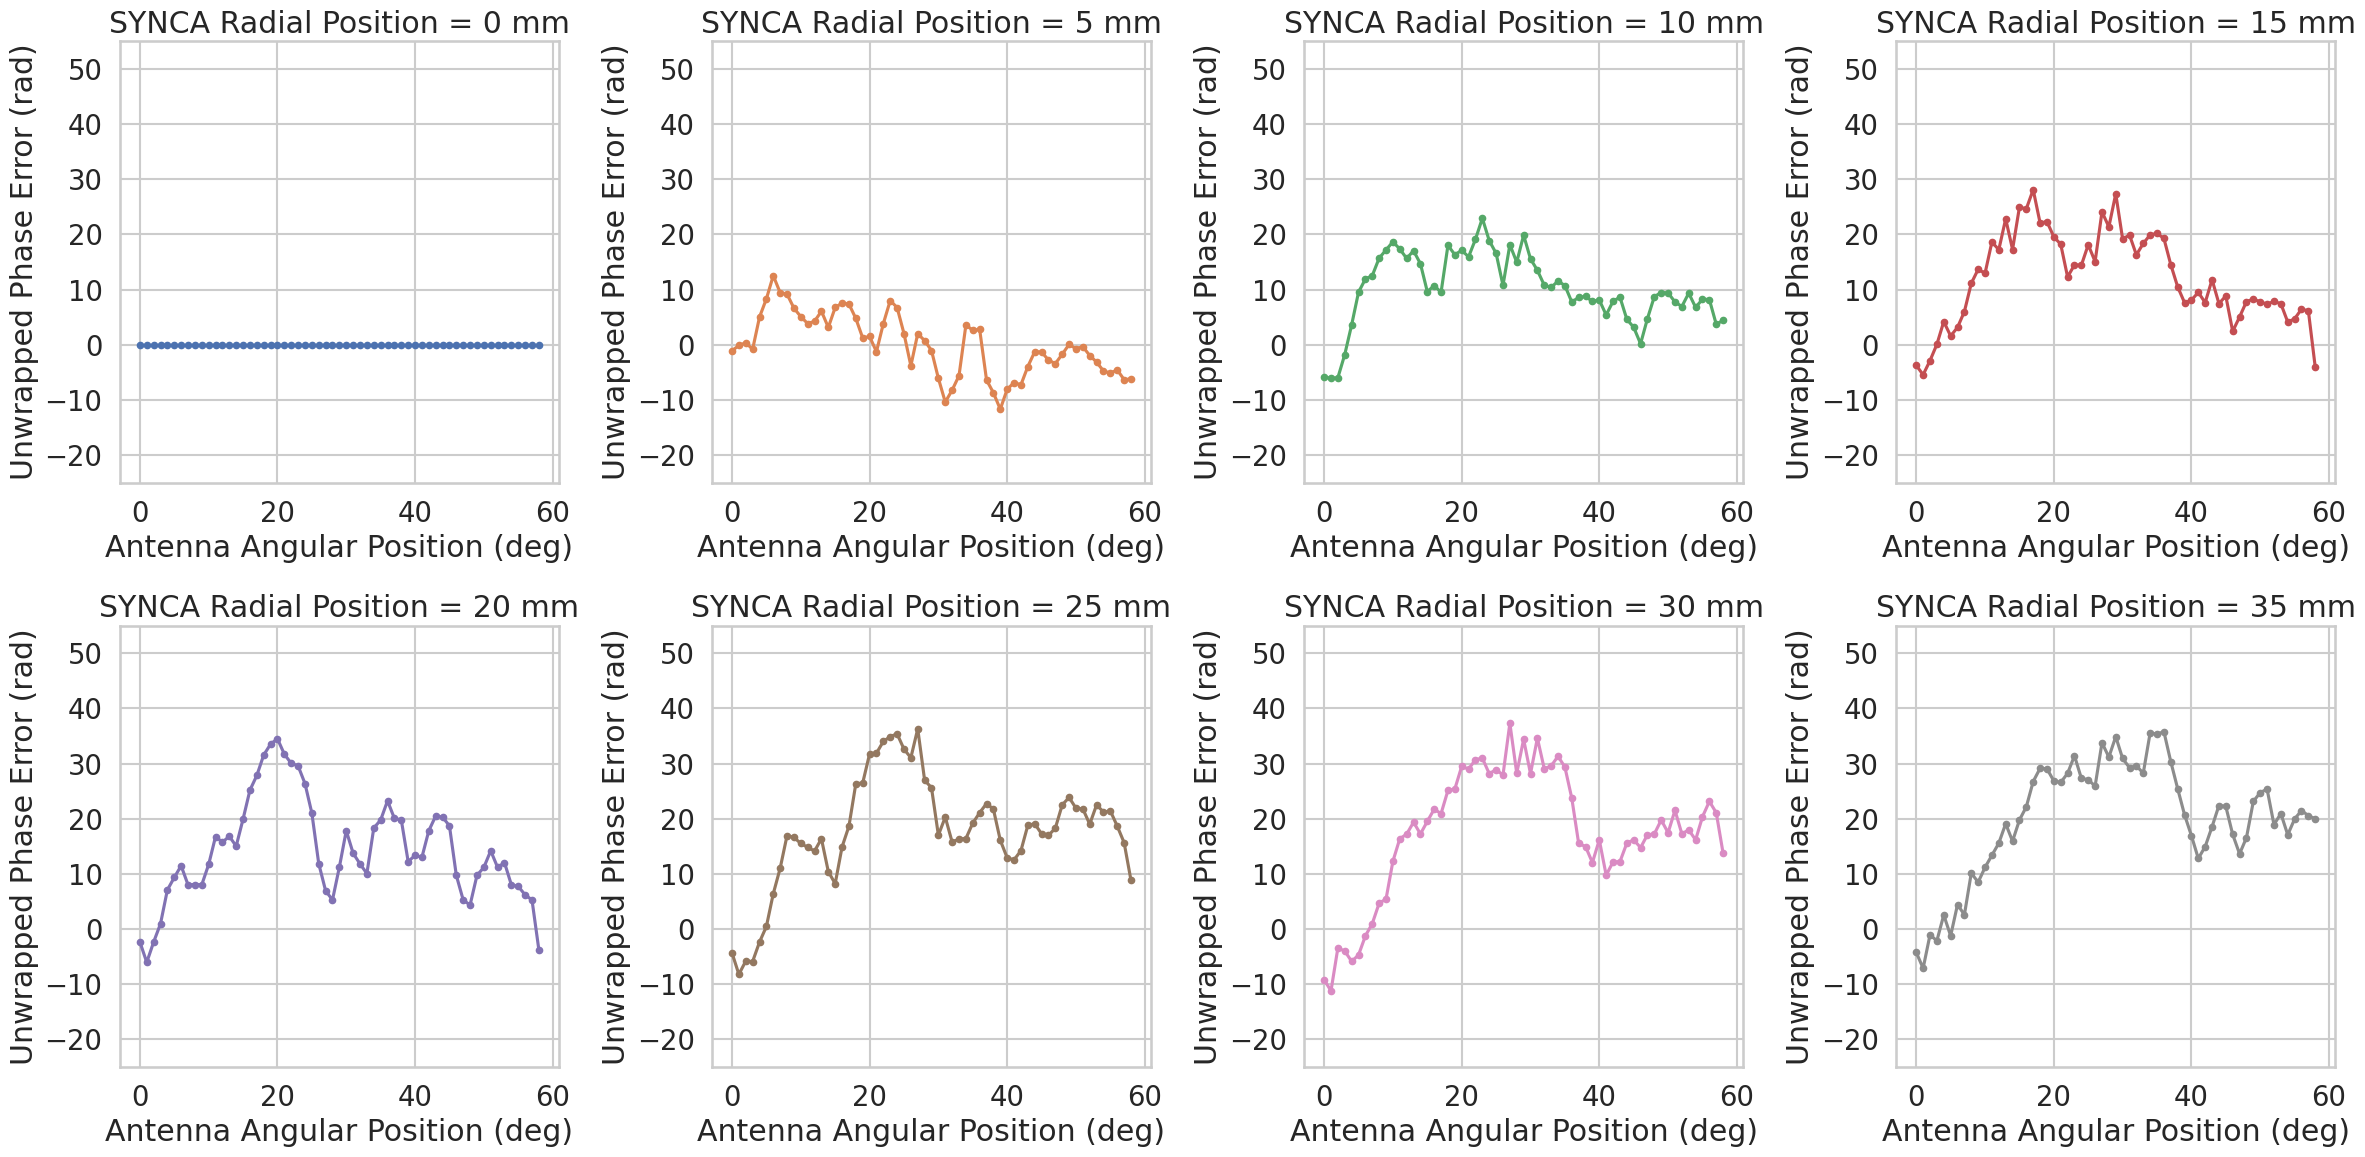

In [12]:
axial_inds = [0,]
axii = [0,]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()

    transform_list = []
    for i_rad in radial_inds:
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        transform_list.append(10*np.log10(abs(np.fft.rfft(corrected_data, norm='forward'))**2))
        
    for i_trans in range(len(transform_list)):
        smoothed_transform = np.convolve(transform_list[i_trans], np.ones(3)/3, mode='valid')
    
        axs[i_trans].plot(
            smoothed_transform - np.convolve(transform_list[0], np.ones(3)/3, mode='valid'),
            #transform_list[i_trans]-transform_list[0],
            color=clist[i_trans],
            marker='.',
            ls='-',
            label = f'{i_rad+1}'
        )
        print(np.trapz(smoothed_transform-np.convolve(transform_list[0], np.ones(3)/3, mode='valid')))
        #axs[i_trans].legend(loc=1)
        axs[i_trans].set_ylim(-25, 55)
        axs[i_trans].set_title(f'SYNCA Radial Position = {radii[i_trans]} mm')
        axs[i_trans].set_xlabel('Antenna Angular Position (deg)')
        axs[i_trans].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# examine jugaad phase errors

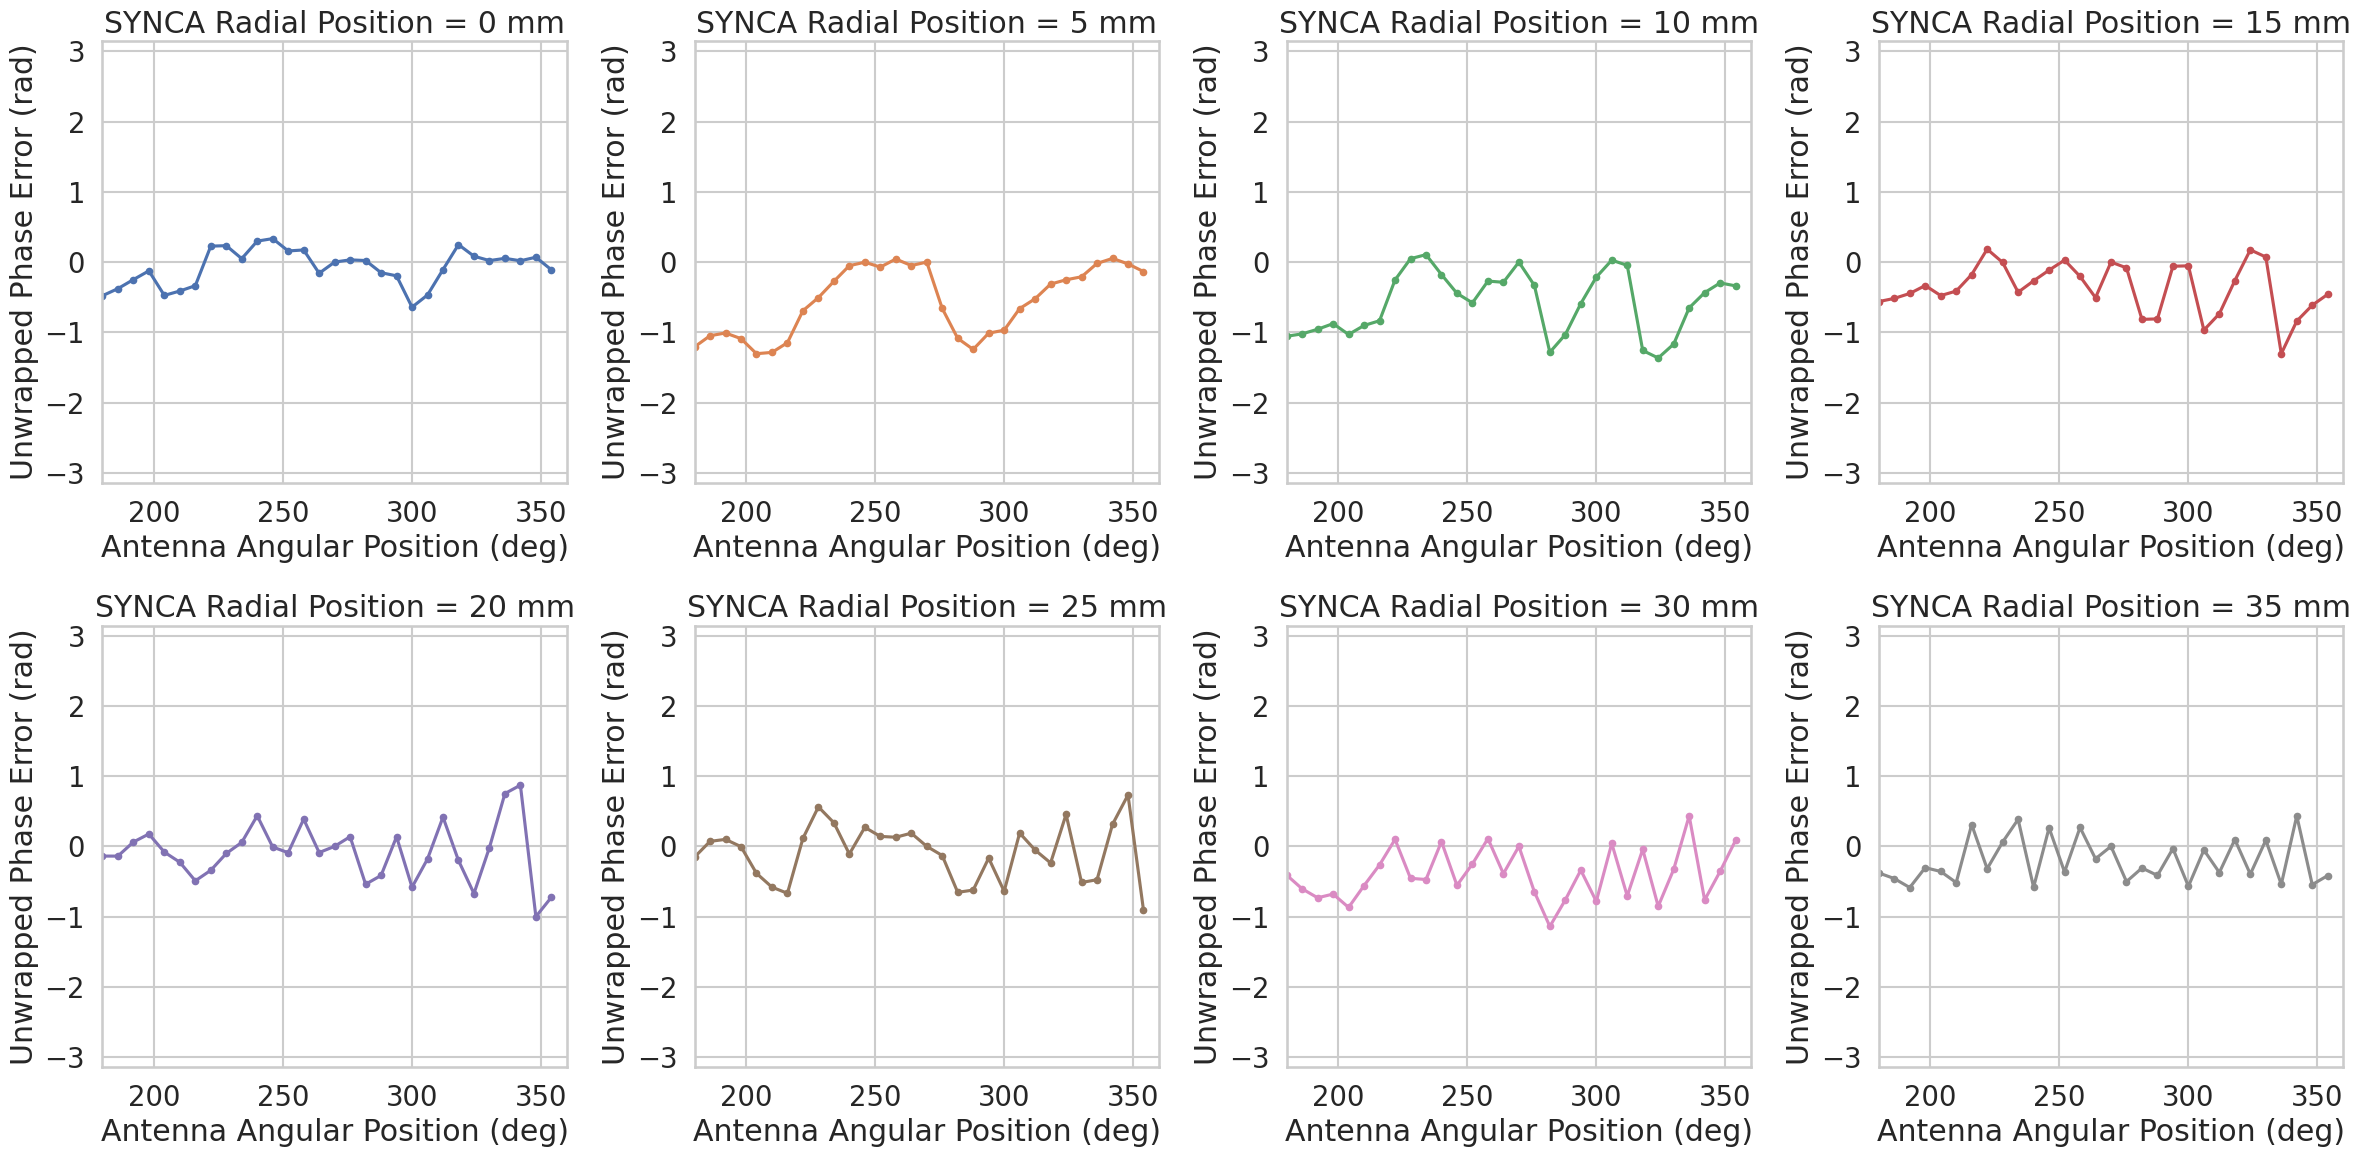

In [13]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.roll(jugaad_data[i_ax,i_rad,75,:],-15),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-np.pi,np.pi)
        axs[i_rad].set_xlim(180,360)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# Examine RMS Jugaad phase error gradient





7.052431200273418
8.143215805304635
13.649085924902785
13.905762783626926
15.37414853638925
13.301597806502869
12.983485477697315
12.024017902743875


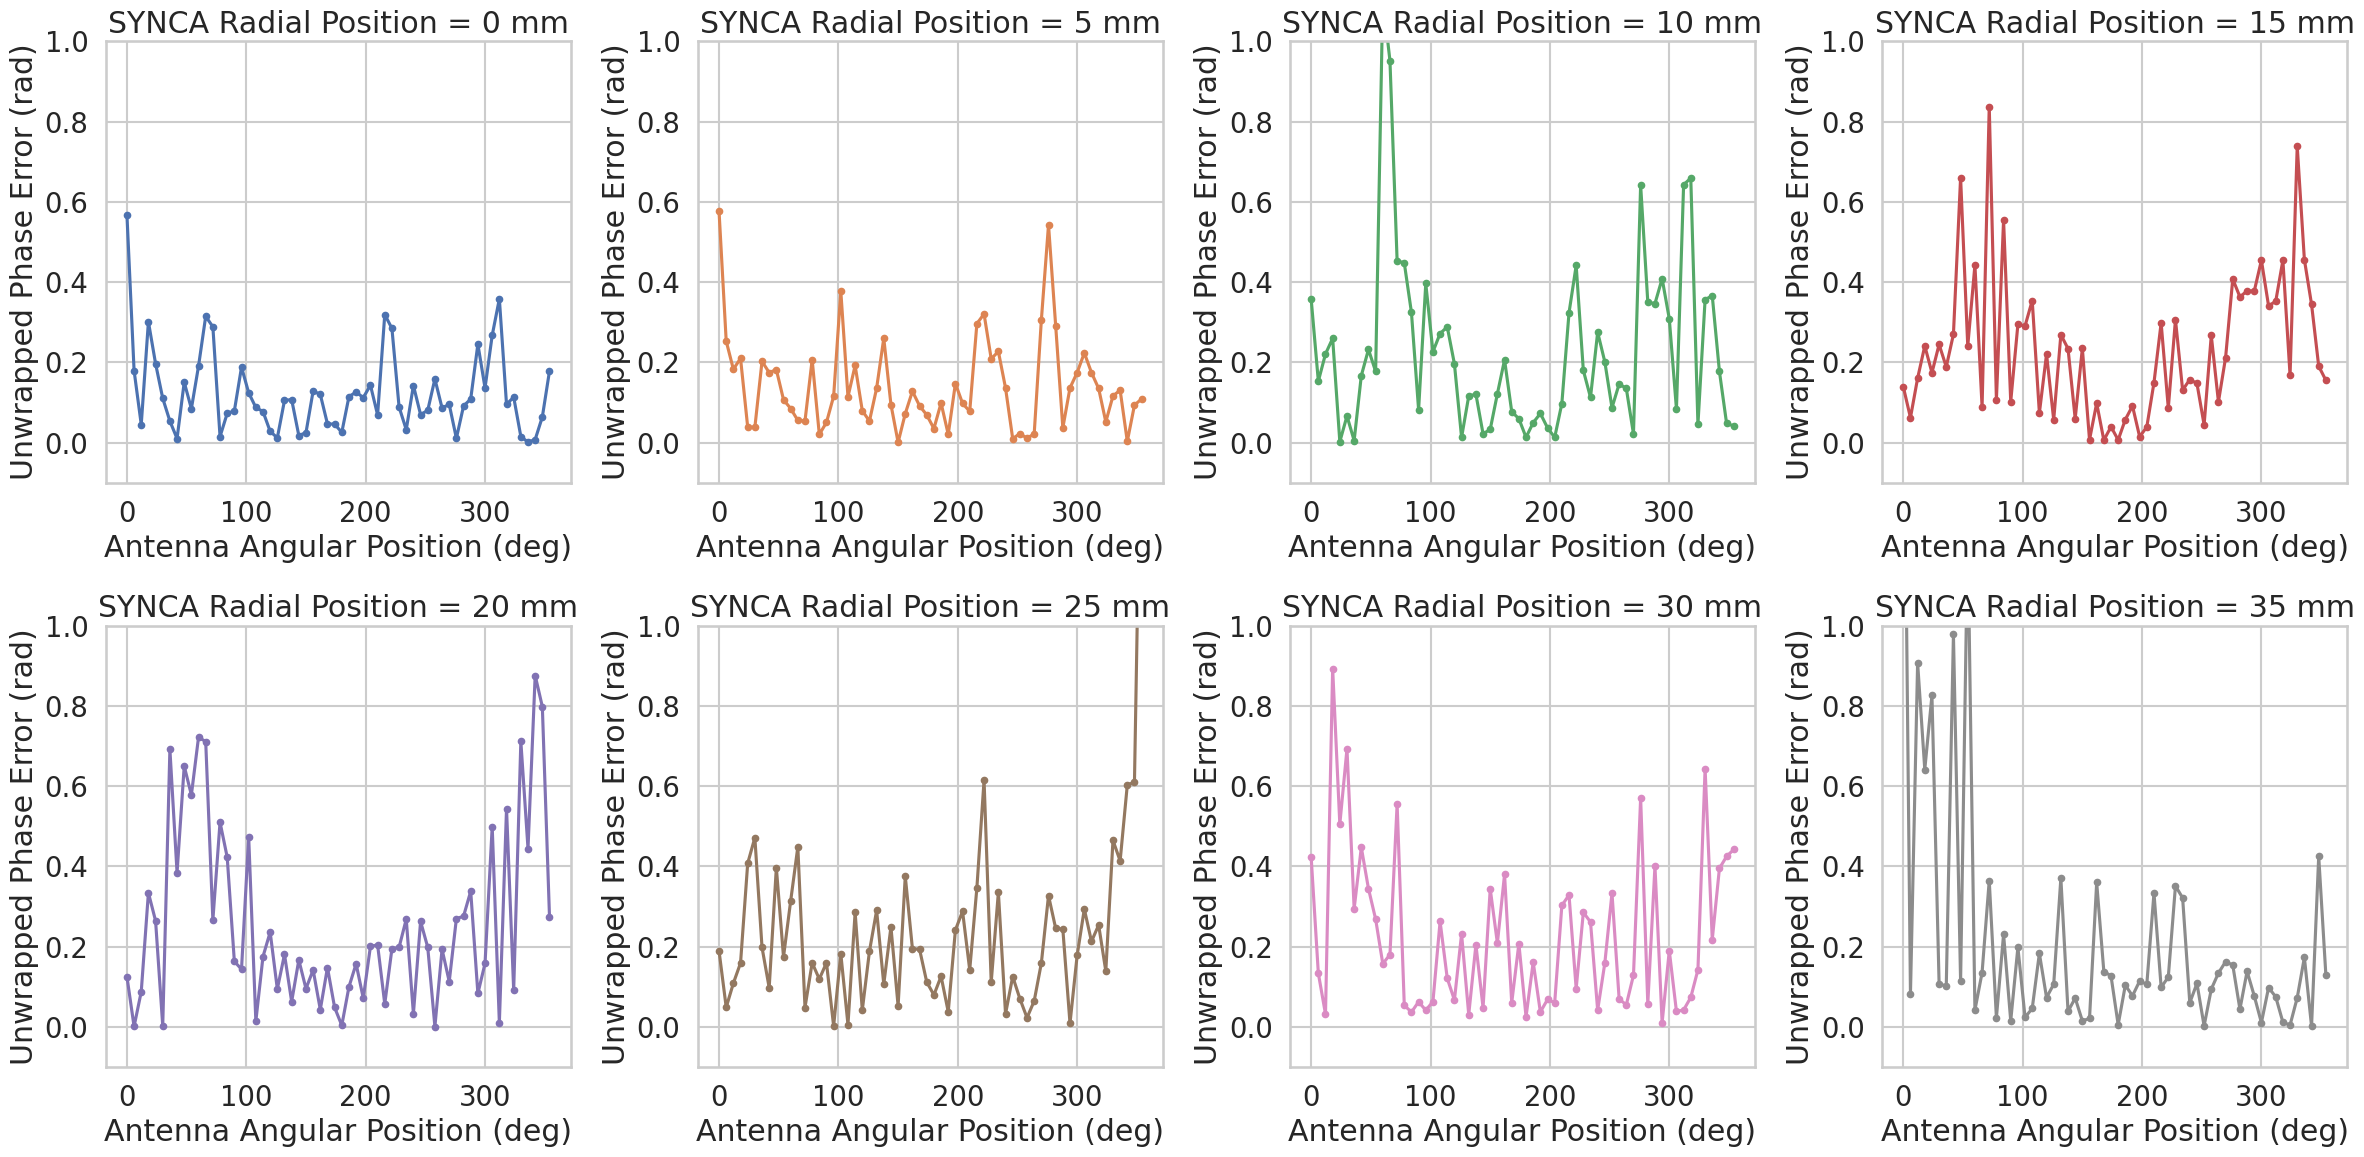

In [14]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.sqrt(np.gradient(np.roll(jugaad_data[i_ax,i_rad,75,:],-15))**2),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        print(np.trapz(np.sqrt(np.gradient(np.roll(jugaad_data[i_ax,i_rad,75,:],-15))**2)))
        axs[i_rad].set_ylim(-0.1,1)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

# plot phase error spectrum for JUGAAD

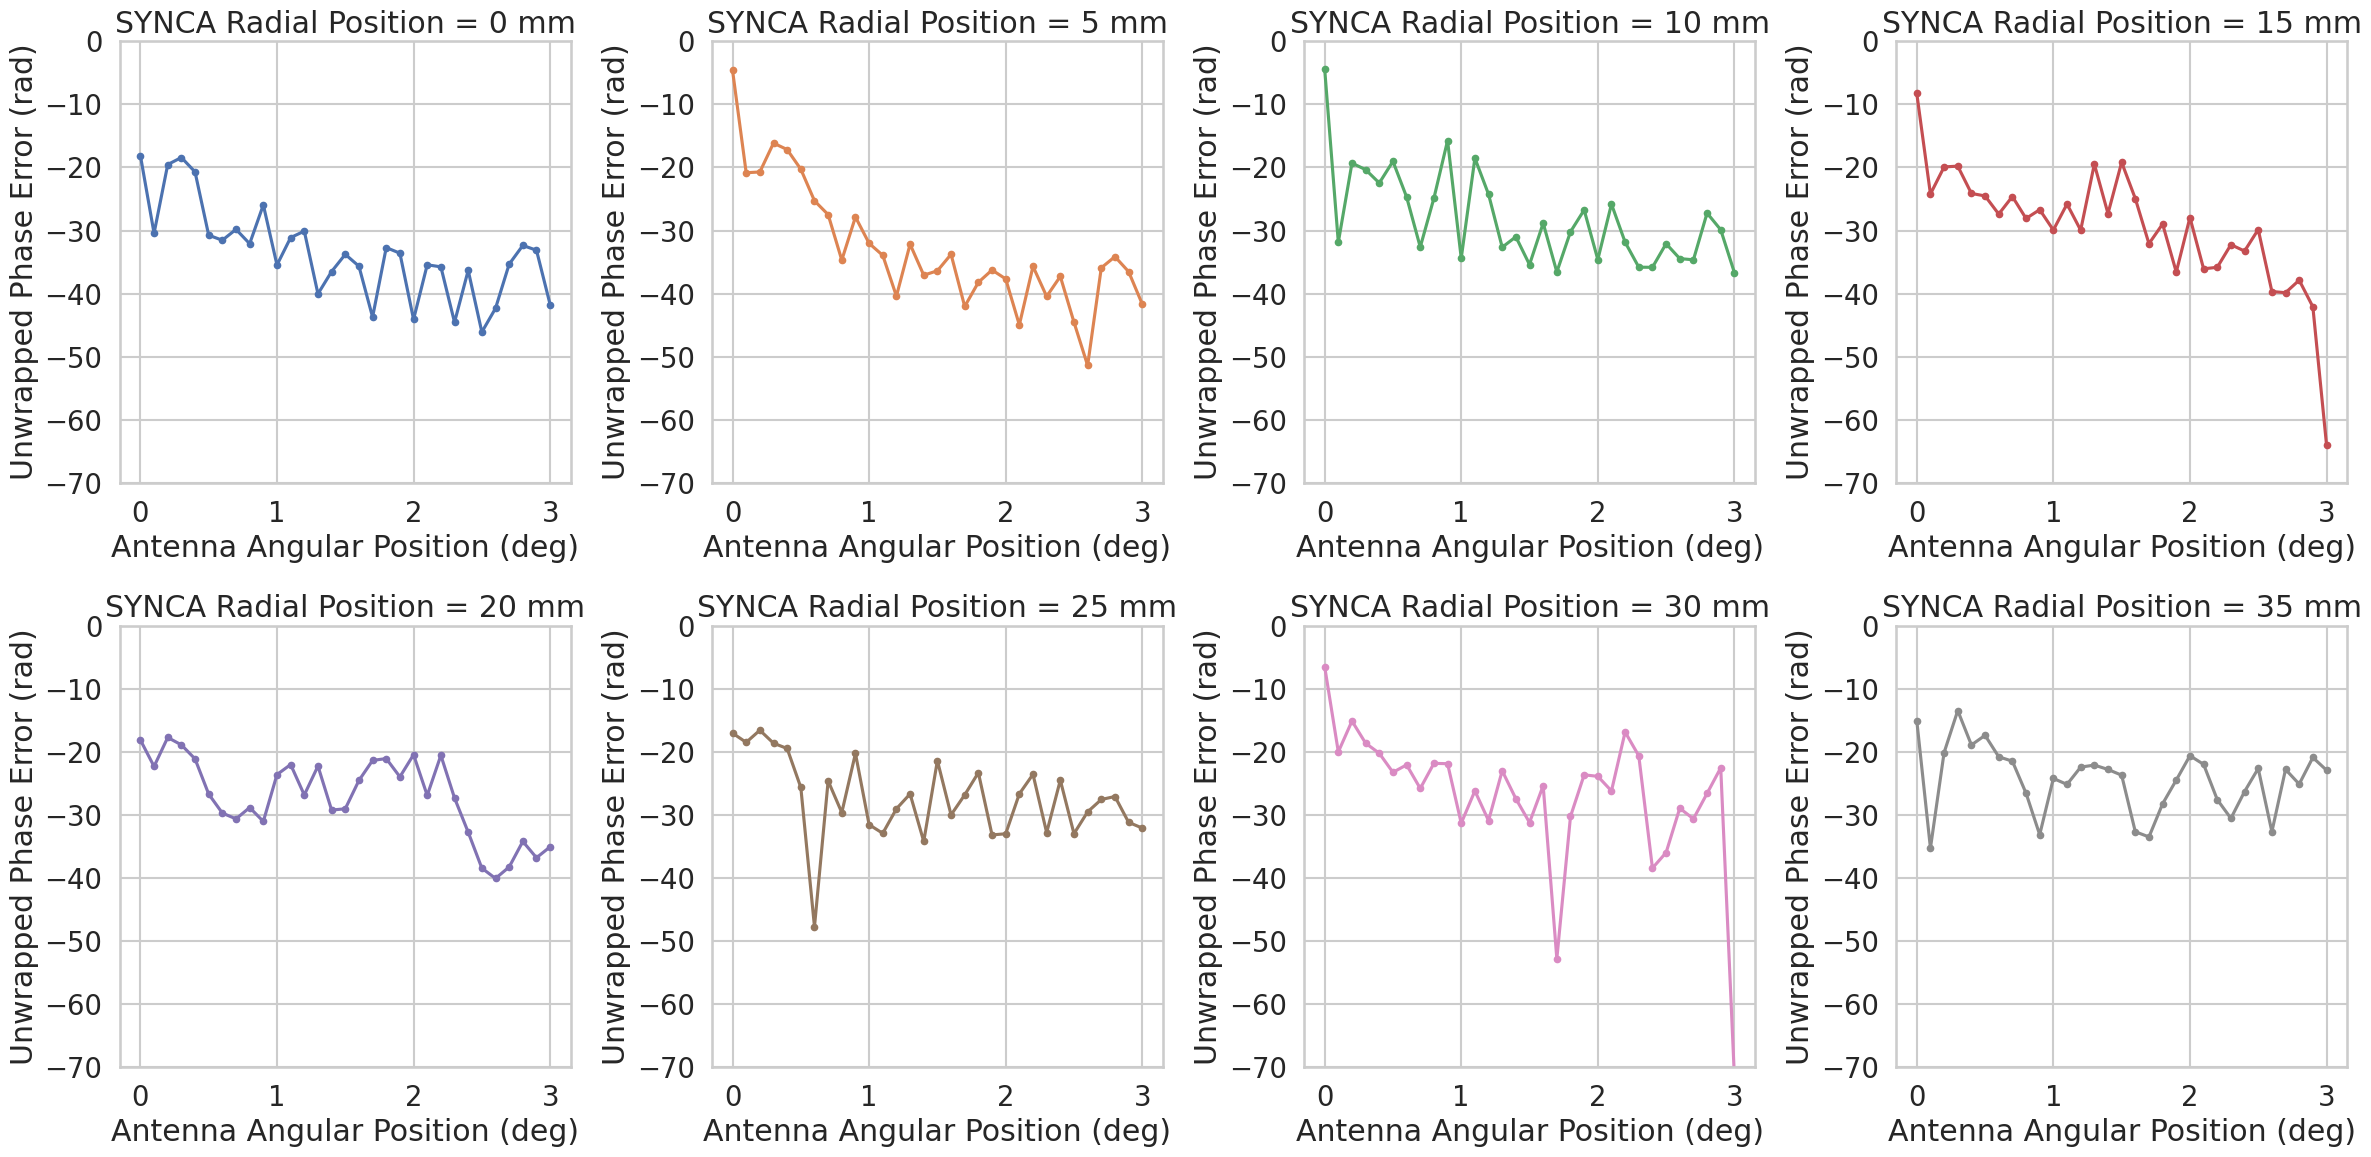

In [15]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.fft.rfftfreq(60,1/6),
            10 * np.log10(abs(np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward'))**2),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-70,0)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# smooth transform of jugaad data and plot on same axis

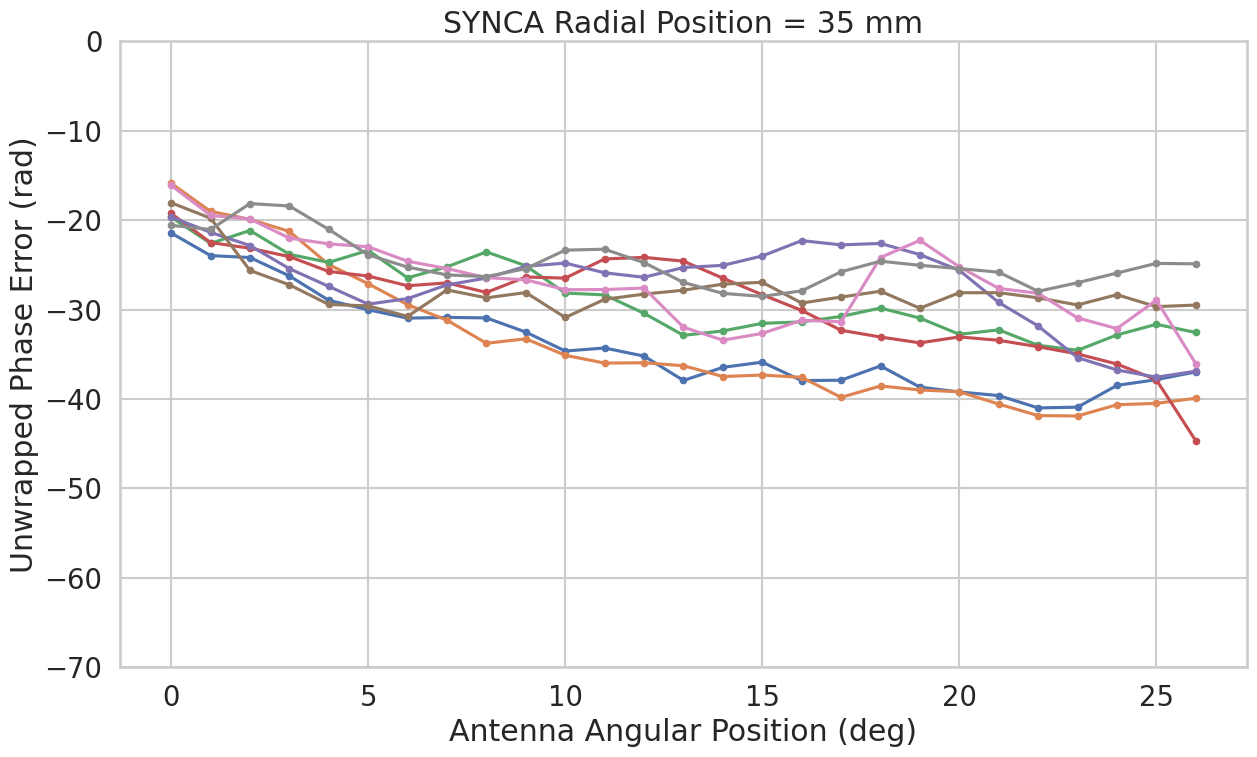

In [16]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)
    
    for i_rad in radial_inds:
        transform = 10 * np.log10(abs(np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward'))**2)
        smoothed_transform = np.convolve(transform, np.ones(5)/5, mode='valid')
        ax.plot(
            smoothed_transform,
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
    ax.set_ylim(-70,0)
    ax.set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
    ax.set_xlabel('Antenna Angular Position (deg)')
    ax.set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# compare synthetic array phase error spectra to JUGAAD

-0.00615380982833443
0.005714657149216389
0.010480509356391297
0.002085376462018138
-0.007754887158586466
-0.0009355152611338702
0.00845860256578104
-0.0025613277332708143


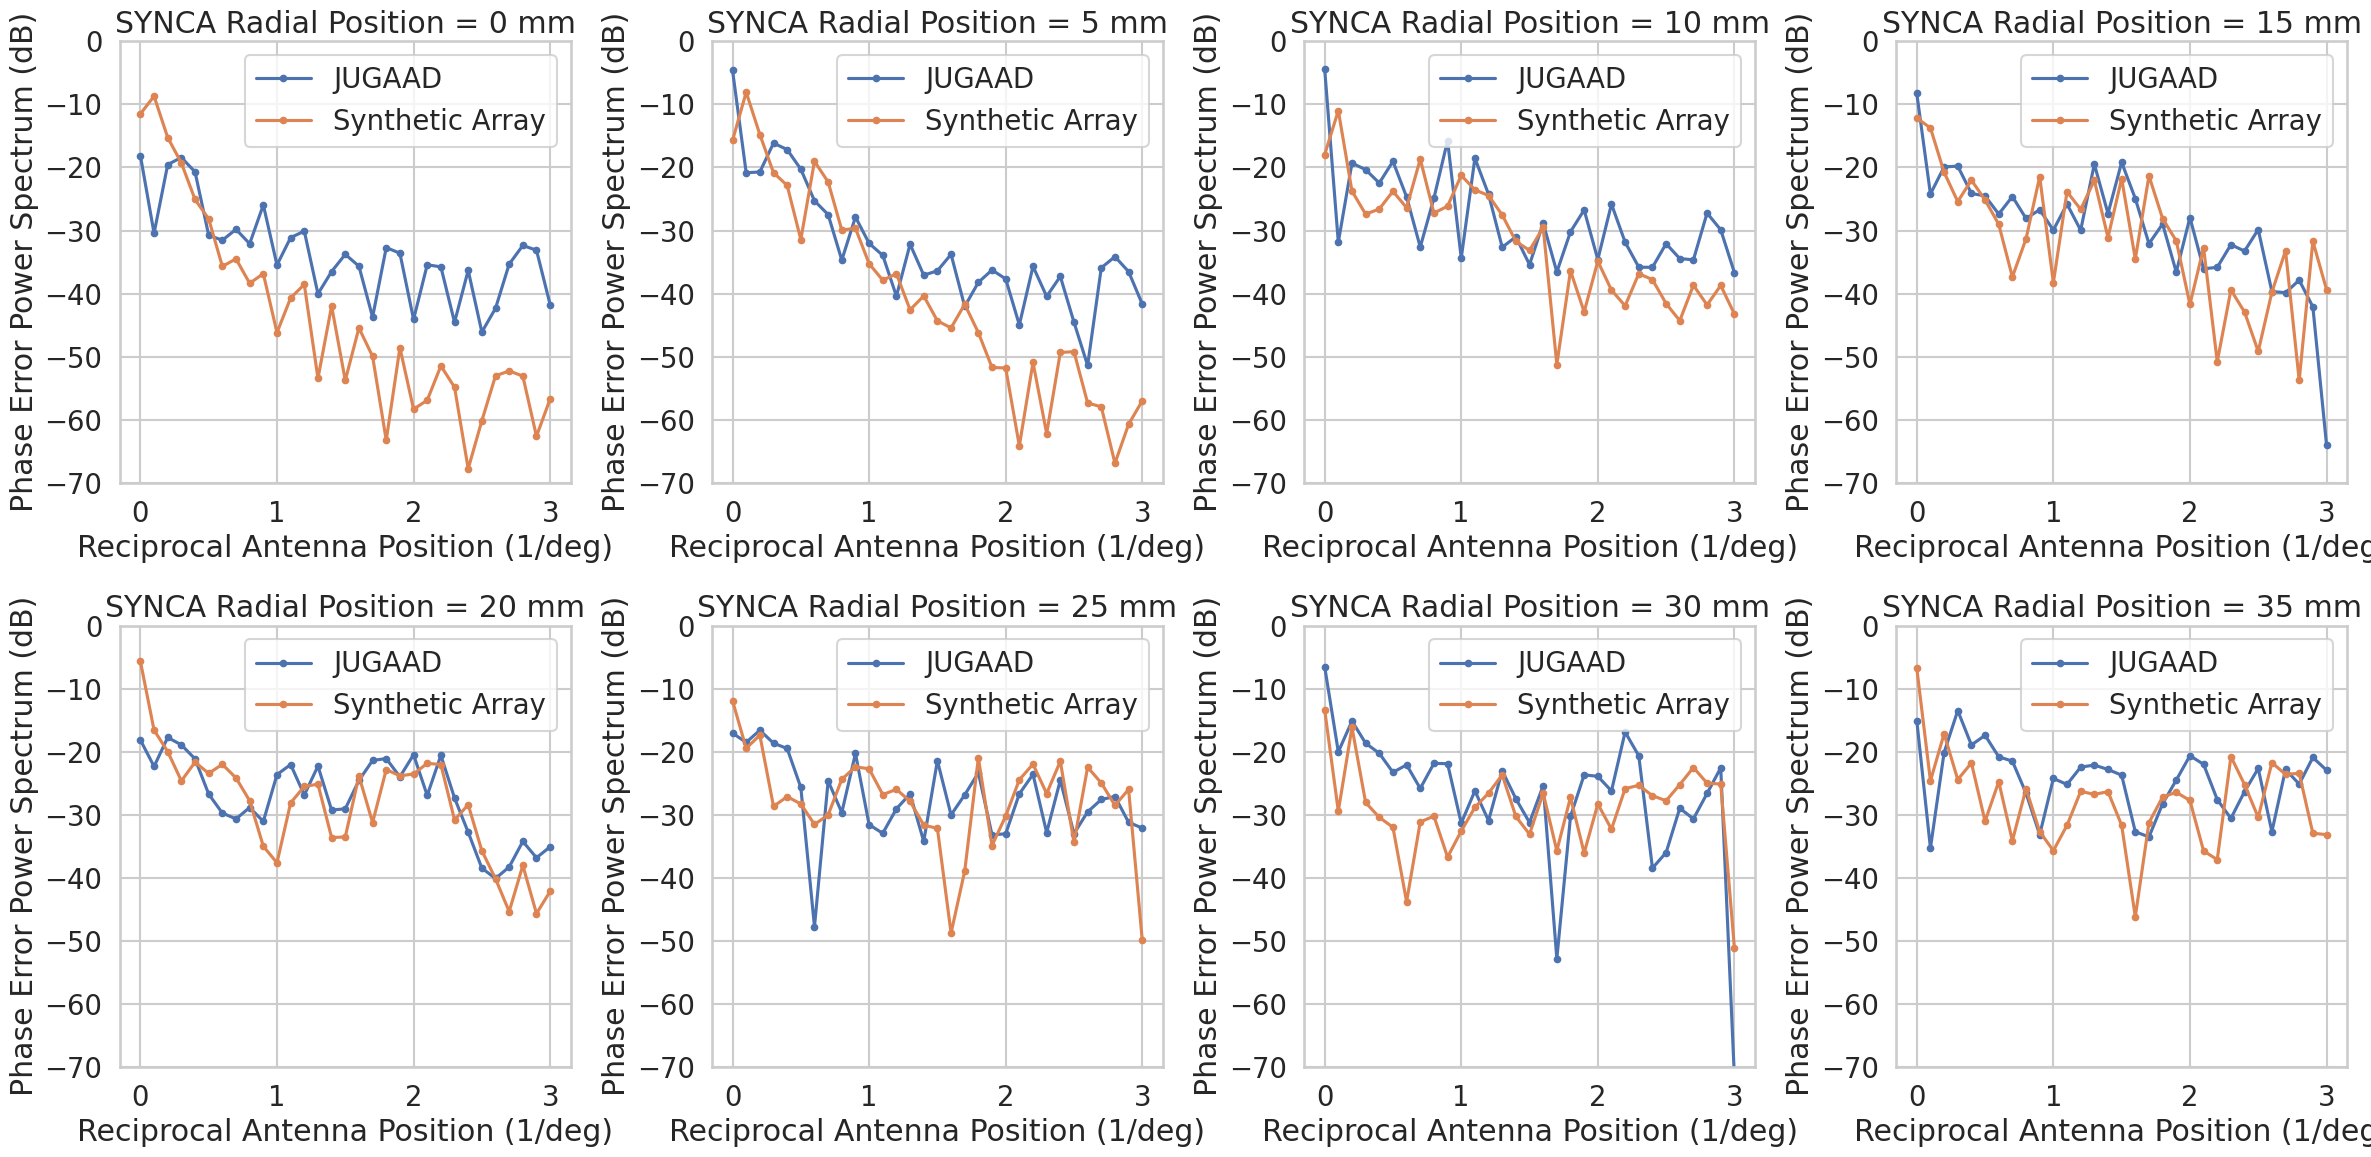

In [20]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        jugaad_transform = abs(np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward'))**2
        axs[i_rad].plot(
            np.fft.rfftfreq(60,1/6),
            10 * np.log10(jugaad_transform),
            color=clist[0],
            marker='.',
            ls='-',
            label='JUGAAD'
        )
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        synthetic_transform = abs(np.fft.rfft(corrected_data[np.arange(0,120,2)], norm='forward'))**2
        axs[i_rad].plot(
            np.fft.rfftfreq(60, 1/6),
            10*np.log10(synthetic_transform),
            color=clist[1],
            marker='.',
            ls='-',
            label='Synthetic Array'
        )
        #print(f'{np.trapz(jugaad_transform) - np.trapz(synthetic_transform)}')
        print(np.mean(jugaad_transform) - np.mean(synthetic_transform))

        axs[i_rad].set_ylim(-70,0)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Reciprocal Antenna Position (1/deg)')
        axs[i_rad].set_ylabel('Phase Error Power Spectrum (dB)')
        axs[i_rad].legend(loc=1)
    plt.tight_layout(pad=1.05)
    name = f'230203_jugaad_synthetic_phase_error_spectrum_comparison_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# compare phase error curves between jugaad and synthetic array

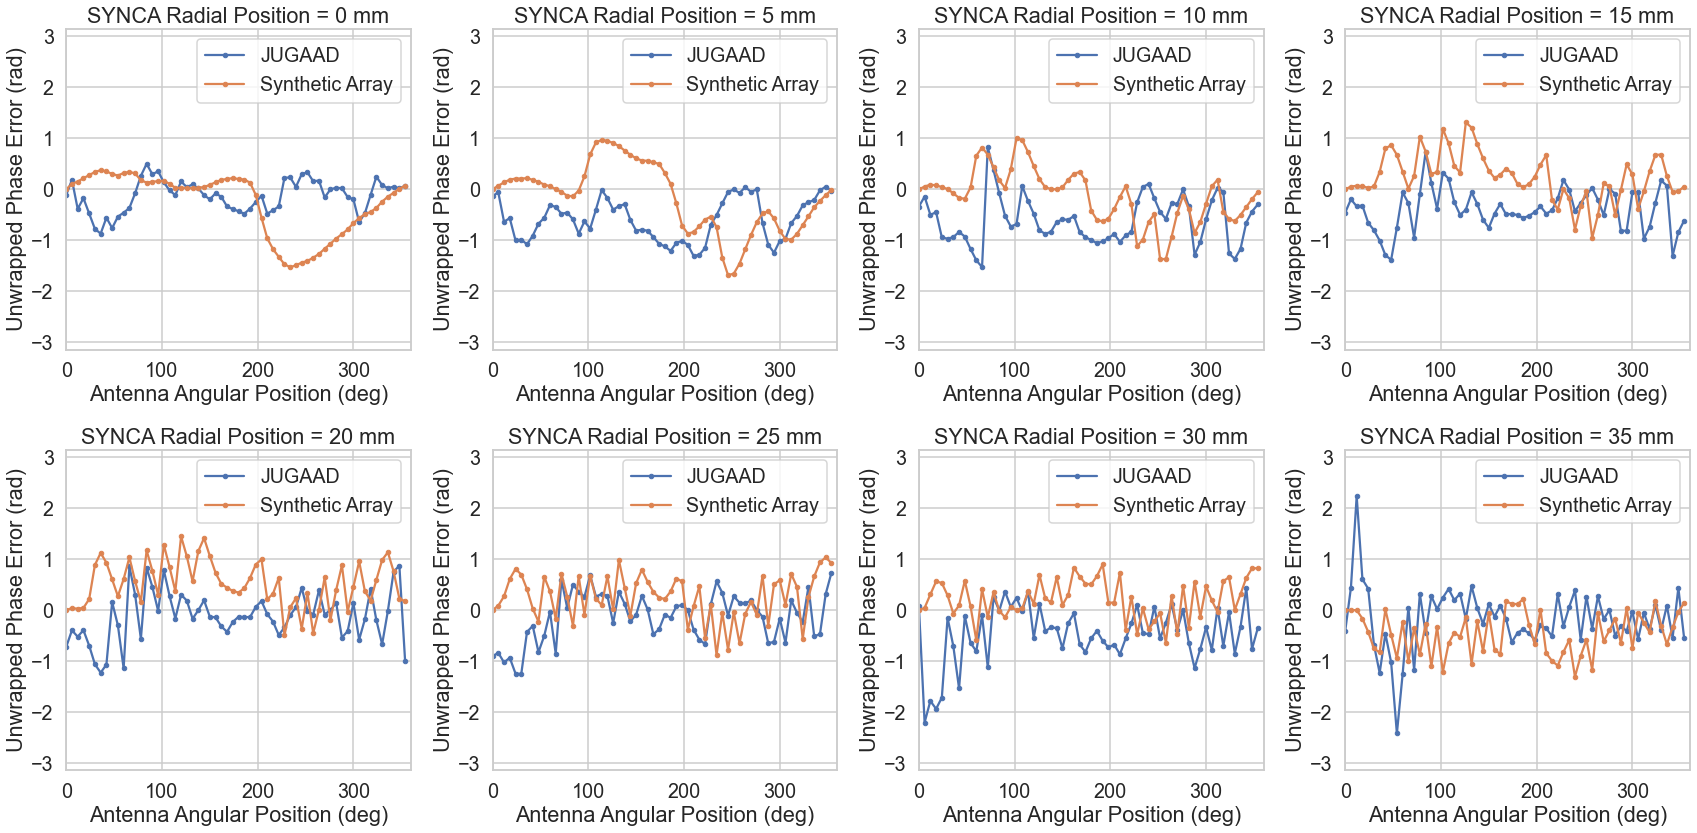

In [141]:
axial_inds = [0,]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.roll(jugaad_data[i_ax,i_rad,75:76,:].mean(axis=0),-14),
            color=clist[0],
            marker='.',
            ls='-',
            label='JUGAAD',
        )
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        axs[i_rad].plot(
            np.arange(0,360,6),
            corrected_data[np.arange(0,120,2)],
            color=clist[1],
            marker='.',
            ls='-',
            label='Synthetic Array'
        )

        axs[i_rad].set_ylim(-np.pi, np.pi)
        axs[i_rad].set_xlim(0,360)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
        axs[i_rad].legend(loc=1)
    plt.tight_layout(pad=1.05)
    name = f'230203_jugaad_synthetic_phase_error_curve_comparison_z{axii[i_ax]}'
    plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)
    
    
    

In [ ]:
axial_inds = [0,]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.roll(jugaad_data[i_ax,i_rad,75:76,:].mean(axis=0),-14),
            color=clist[i_rad],
            marker='.',
            ls='-',
        )
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        axs[i_rad].plot(
            np.arange(0,360,6),
            corrected_data[np.arange(0,120,2)],
            color=clist[i_rad],
            marker='None',
            ls='--',
        )

        axs[i_rad].set_ylim(-np.pi, np.pi)
        axs[i_rad].set_xlim(0,360)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)
    
    

# remove the mean from jugaad and synthetic array, try subtracting the cleaner synthetic data from the jugaad

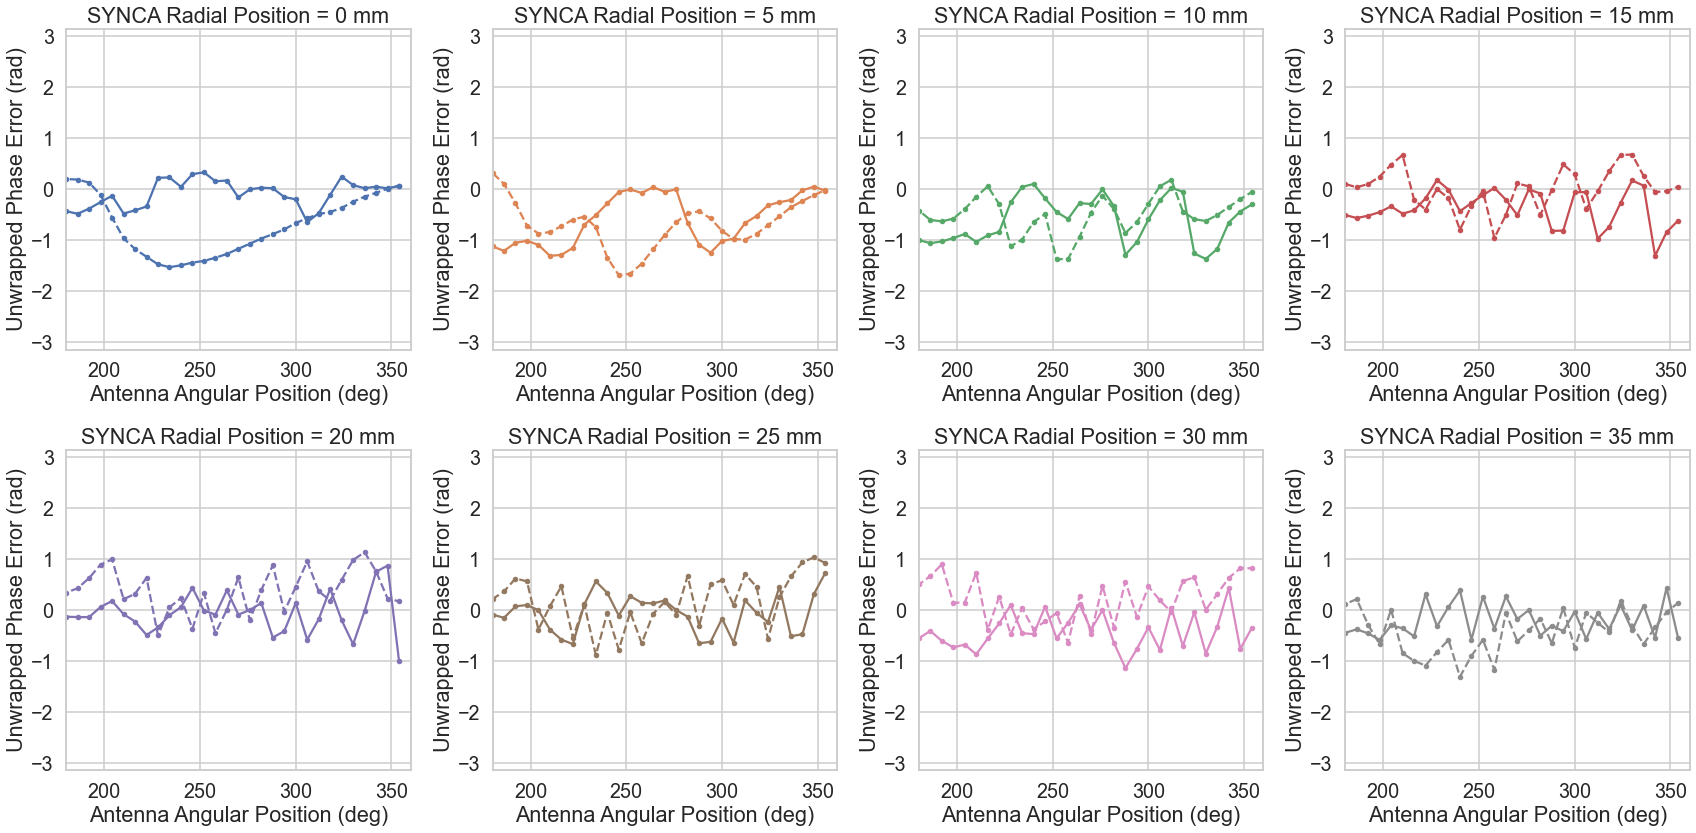

In [137]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        
        antenna_bias_jugaad = np.convolve(jugaad_data[i_ax,0,75,:], np.ones(5)/5, mode='same')
        antenna_bias_synth = np.convolve(
            error_corrector(synth_data[i_ax,0,:], synth_error_dict[i_ax][0]),
            np.ones(5)/5,
            mode='same'
        )
        
        jugaad_temp = np.roll(jugaad_data[i_ax,i_rad,75,:],-14)
        #jugaad_temp -= jugaad_temp.mean()
        axs[i_rad].plot(
            np.arange(0,360,6),
            jugaad_temp,
            color=clist[i_rad],
            marker='.',
            ls='-',
        )
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        synth_temp = corrected_data #- corrected_data.mean()
        axs[i_rad].plot(
            np.arange(0,360,6),
            (synth_temp)[np.arange(0,120,2)],
            color=clist[i_rad],
            marker='.',
            ls='--',
        )

        axs[i_rad].set_ylim(-np.pi, np.pi)
        axs[i_rad].set_xlim(180,360)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)

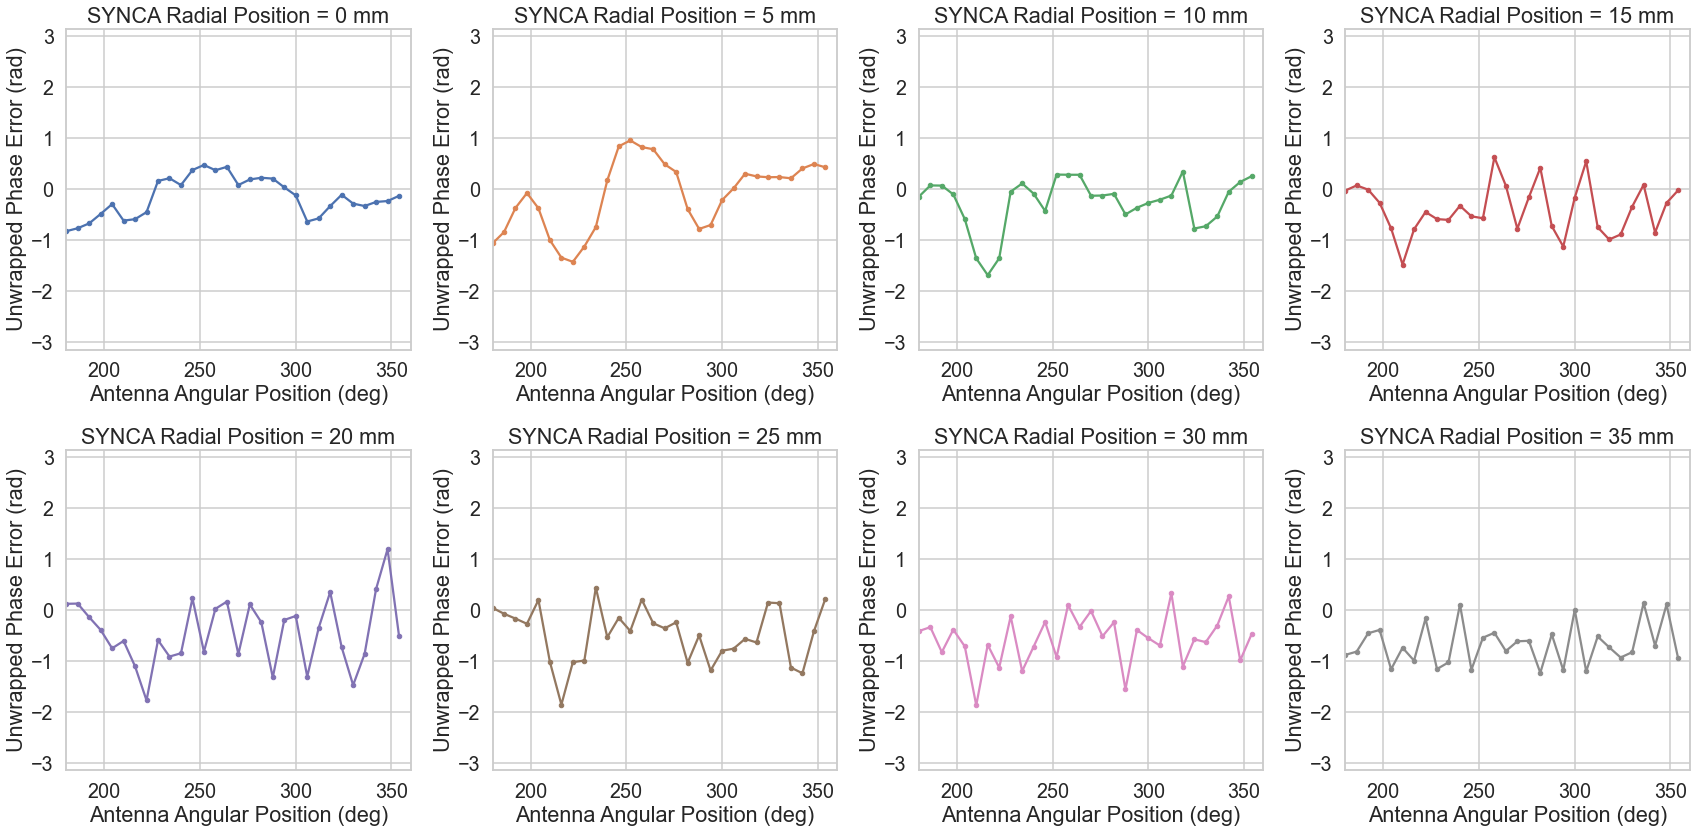

In [97]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        
        antenna_bias_jugaad = np.convolve(jugaad_data[i_ax,0,75,:], np.ones(5)/5, mode='same')
        antenna_bias_synth = np.convolve(
            error_corrector(synth_data[i_ax,0,:], synth_error_dict[i_ax][0]),
            np.ones(5)/5,
            mode='same'
        )
        jugaad_temp = np.roll(jugaad_data[i_ax,i_rad,75,:],-14)
        jugaad_temp -= jugaad_temp.mean()
        
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        synth_temp = corrected_data - corrected_data.mean()
        
        axs[i_rad].plot(
            np.arange(0,360,6),
            (jugaad_temp-antenna_bias_jugaad) - (synth_temp-antenna_bias_synth)[np.arange(0,120,2)],
            color=clist[i_rad],
            marker='.',
            ls='-',
        )

        axs[i_rad].set_ylim(-np.pi, np.pi)
        axs[i_rad].set_xlim(180,360)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)

# plot difference between jugaad and synthetic array

335.1632856391342
234.38353665310413
110.6097333579329
65.38994815264428
51.13345714485233
9.86536061741618
65.63705286257432
116.89954778151234


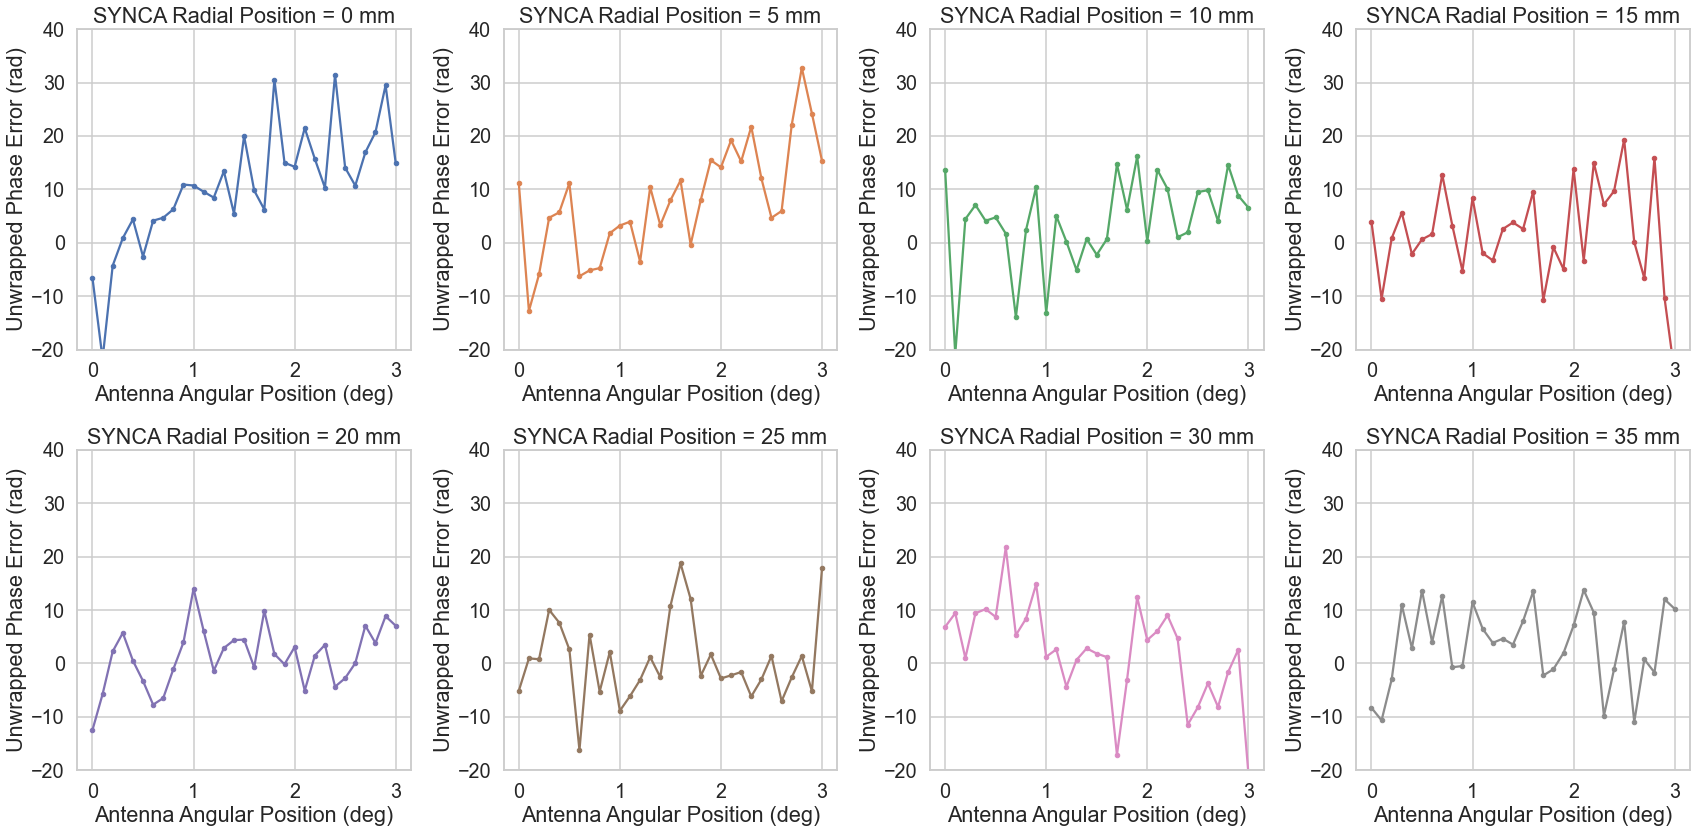

In [46]:
axial_inds = [0]
axii = [0]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        jugaad_spectrum = 10 * np.log10(abs(np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward'))**2)
        corrected_data = error_corrector(synth_data[i_ax,i_rad,np.arange(0,120,1)], synth_error_dict[i_ax][i_rad])
        synth_spectrum = 10*np.log10(abs(np.fft.rfft(corrected_data[np.arange(0,120,2)], norm='forward'))**2)
        
        axs[i_rad].plot(
            np.fft.rfftfreq(60,1/6),
            jugaad_spectrum-synth_spectrum,
            color=clist[i_rad],
            marker='.',
            ls='-',
        )
        
        print(np.trapz(jugaad_spectrum[1:]-synth_spectrum[1:]))

        axs[i_rad].set_ylim(-20,40)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    #name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


# plot real component of transformm

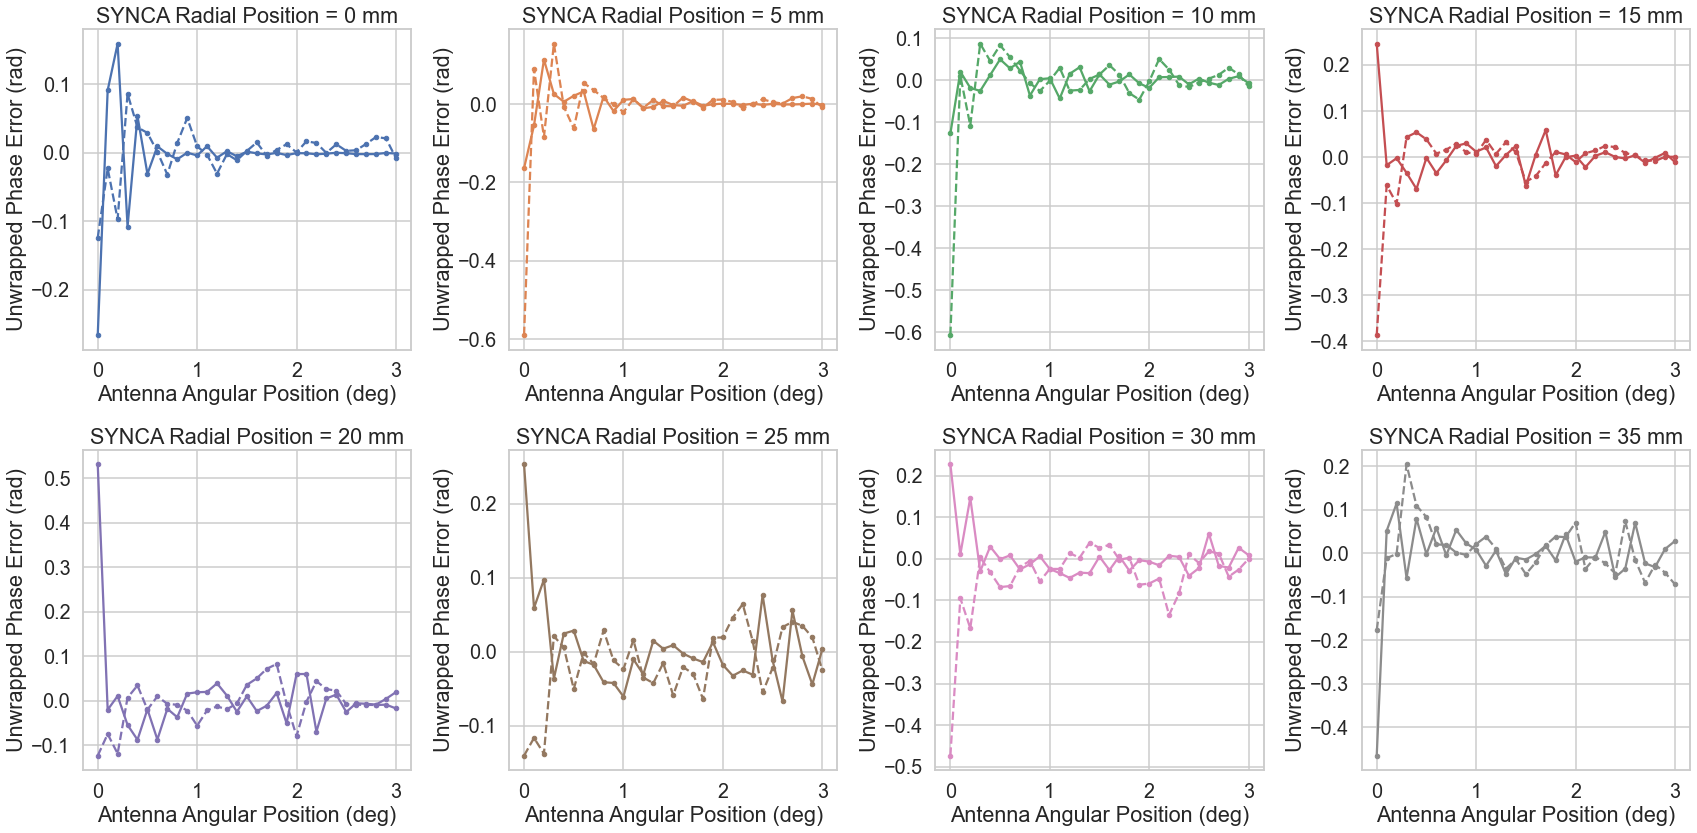

In [47]:
axial_inds = [0,]
axii = [0,5,10]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.fft.rfftfreq(60, 1/6),
            np.fft.rfft(synth_data[i_ax,i_rad,np.arange(0,120,2)], norm='forward').real,
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        
        axs[i_rad].plot(
            np.fft.rfftfreq(60,1/6),
            np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward').real,
            color=clist[i_rad],
            marker='.',
            ls='--',
            #markersize='15',
        )
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

# plot imaginary component of transform

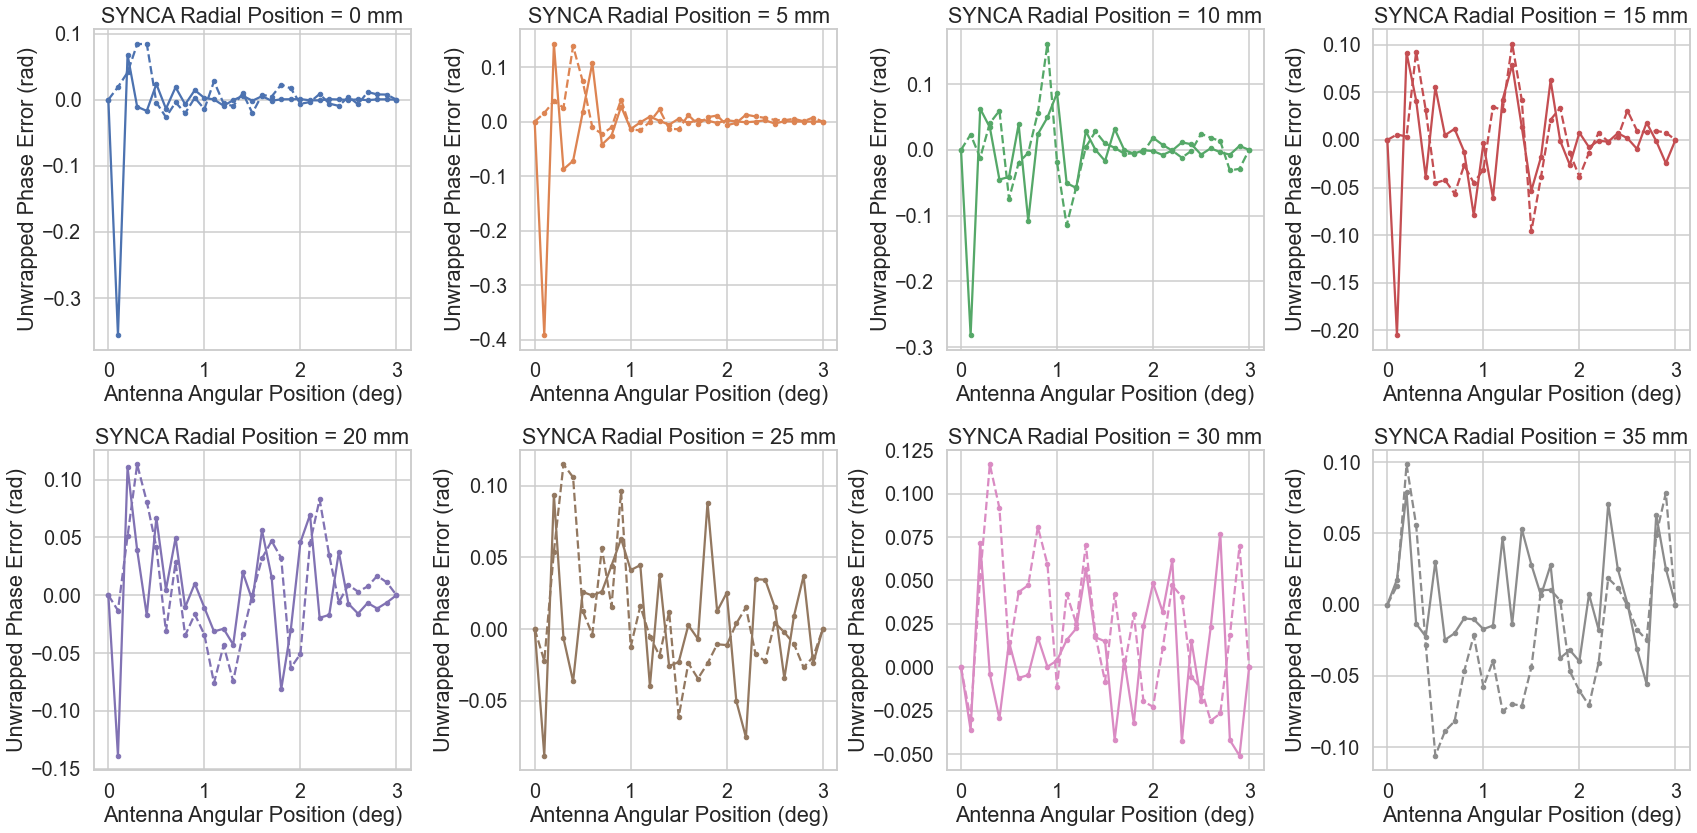

In [48]:
axial_inds = [0,]
axii = [0,5,10]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.fft.rfftfreq(60, 1/6),
            np.fft.rfft(synth_data[i_ax,i_rad,np.arange(0,120,2)], norm='forward').imag,
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        
        axs[i_rad].plot(
            np.fft.rfftfreq(60,1/6),
            np.fft.rfft(np.roll(jugaad_data[i_ax,i_rad,75,:],-15), norm='forward').imag,
            color=clist[i_rad],
            marker='.',
            ls='--',
            #markersize='15',
        )
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230120_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)

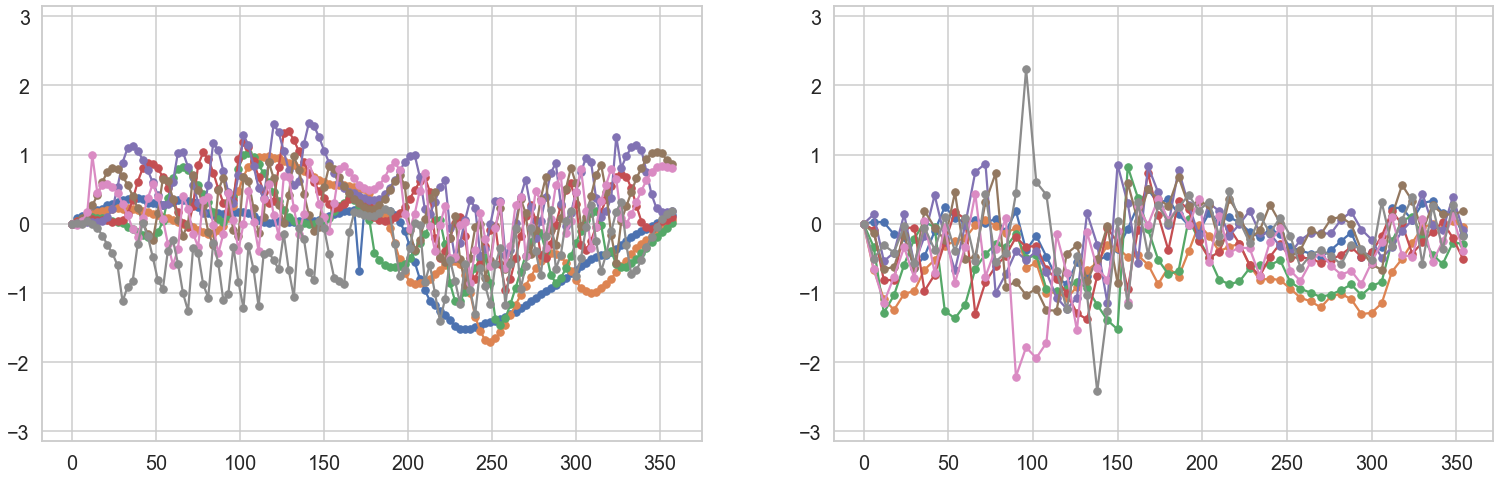

In [167]:
axial_inds = [0]
radial_inds = np.arange(0,8,1)

###

for i_ax in axial_inds:
    fig,axs = plt.subplots(1,2,sharex=False,sharey=False, figsize=(26, 8))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[0].plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,:],
            #color='r',
            marker='.',
            ls='-',
            markersize='15',
            label='Synthetic Array'
        )
        axs[1].plot(
            np.arange(0,360,6),
            jugaad_data[i_ax,i_rad,75,:],
            #color='b',
            marker='.',
            ls='-',
            markersize='15',
            label='Jugaad'
        )
        #axs[i_rad].legend(loc=1)
    axs[0].set_ylim(-np.pi,np.pi)
    axs[1].set_ylim(-np.pi,np.pi)

    

        

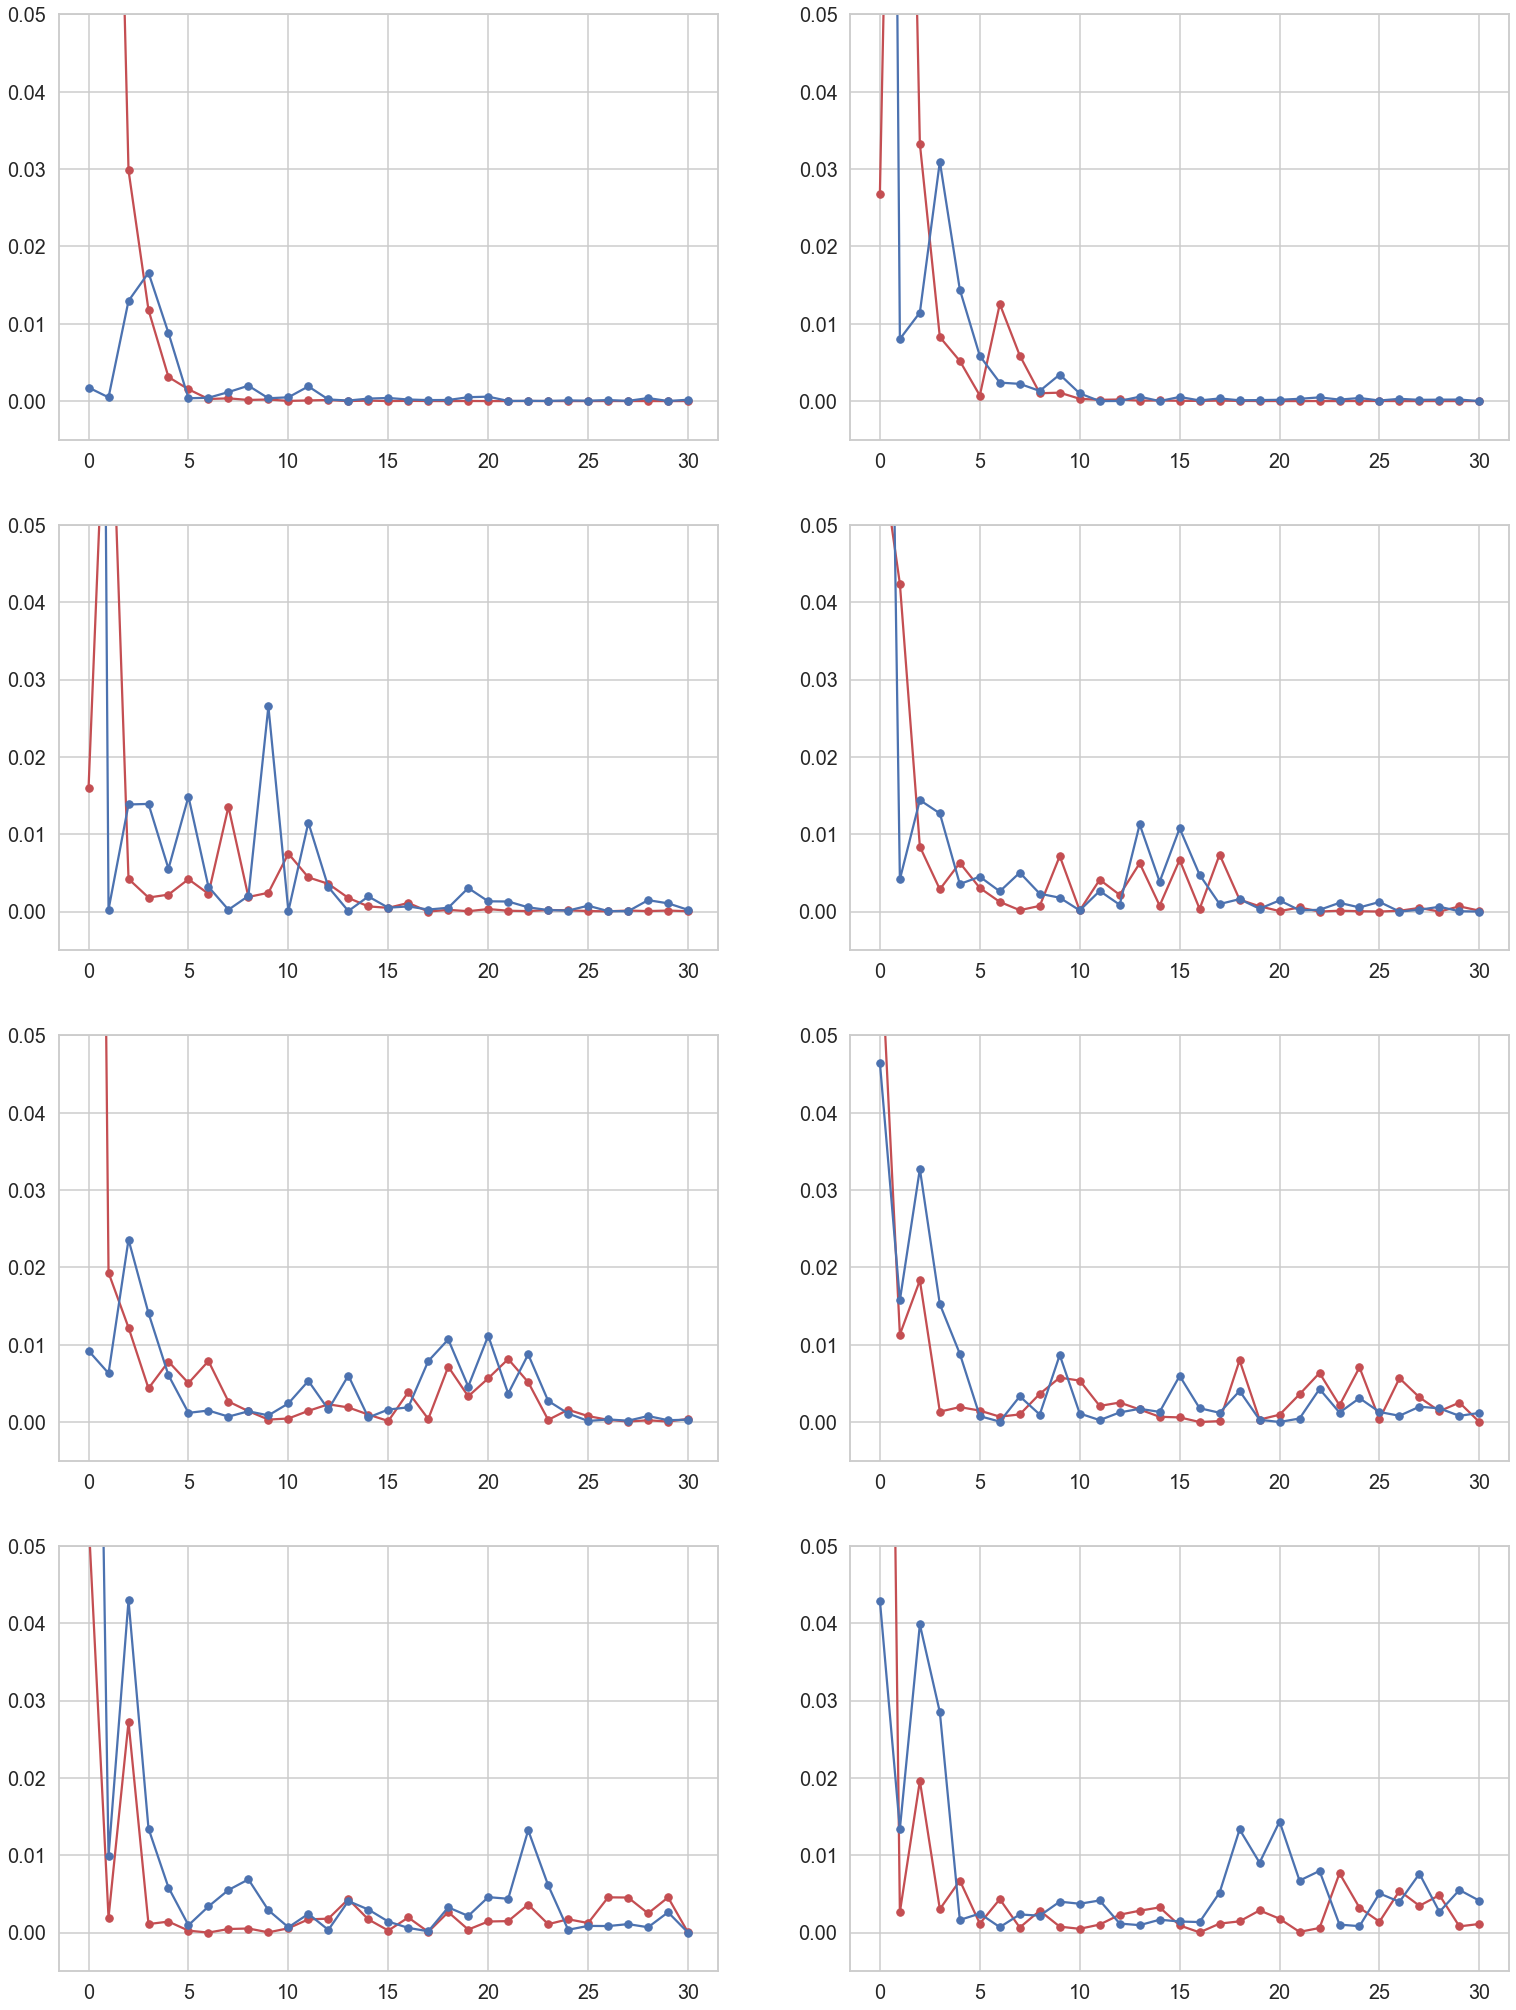

In [56]:
axial_inds = [0]
radial_inds = np.arange(0,8,1)


for i_ax in axial_inds:
    fig,axs = plt.subplots(4,2,sharex=False,sharey=False, figsize=(26, 36))
    axs=axs.flatten()
    for i_rad in radial_inds:

        axs[i_rad].plot(
            abs(np.fft.rfft(synth_data[i_ax,i_rad,:],norm='forward'))**2,
            color='r',
            marker='.',
            ls='-',
            markersize='15',
            label='Synthetic Array'
        )

        axs[i_rad].plot(
            abs(np.fft.rfft(jugaad_data[i_ax,i_rad,:],norm='forward'))**2,
            color='b',
            marker='.',
            ls='-',
            markersize='15',
            label='Jugaad'
        )

        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-0.005,0.05)

# make images of phase errors

In [58]:
print(synth_data.shape)
print(jugaad_data.shape)

(6, 8, 60)
(6, 8, 60)


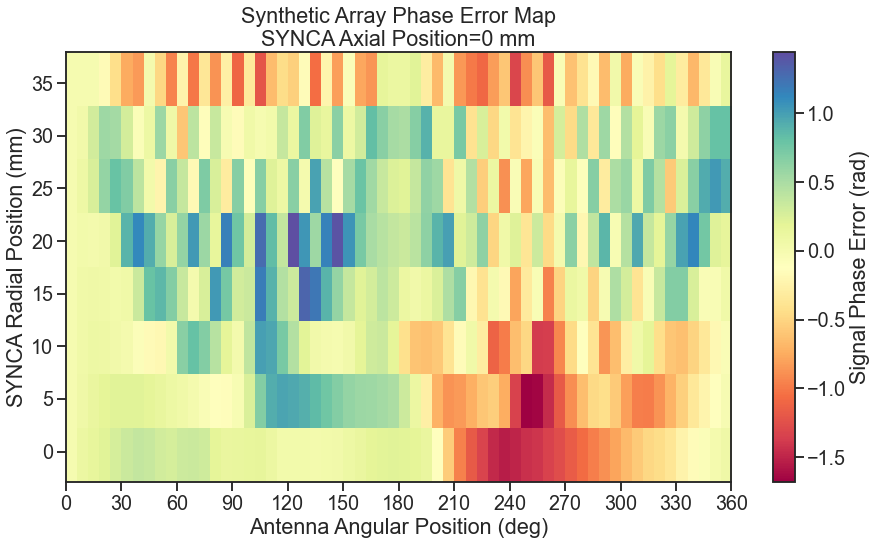

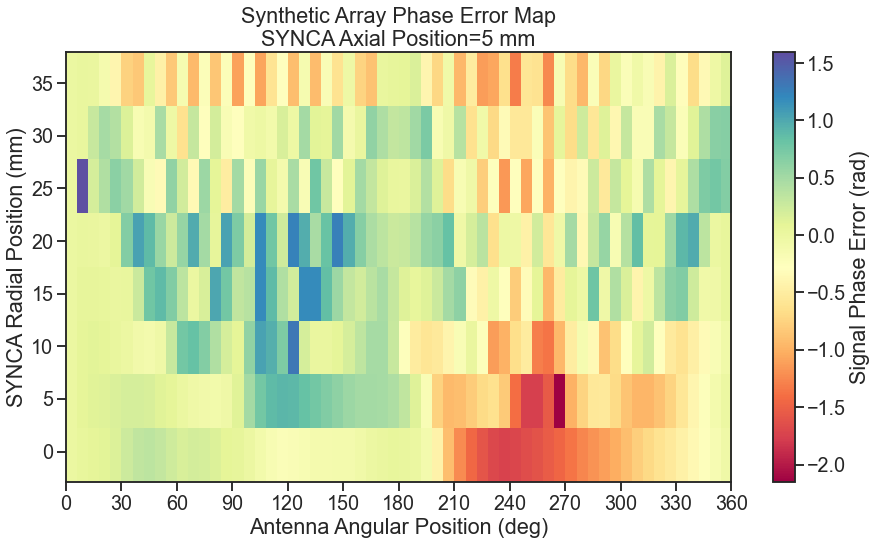

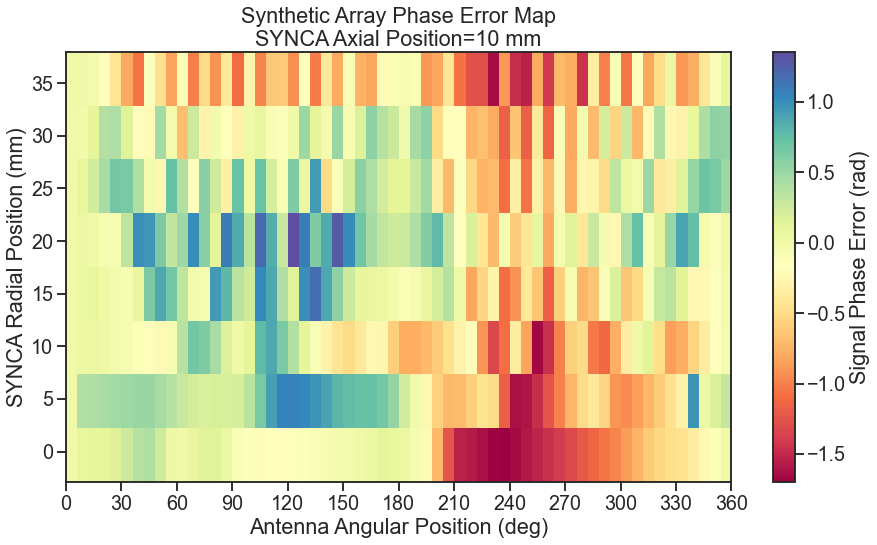

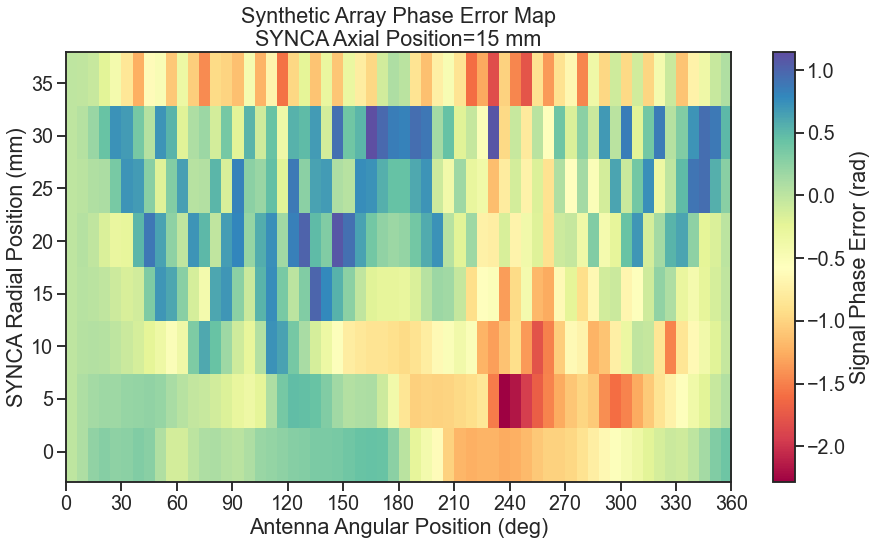

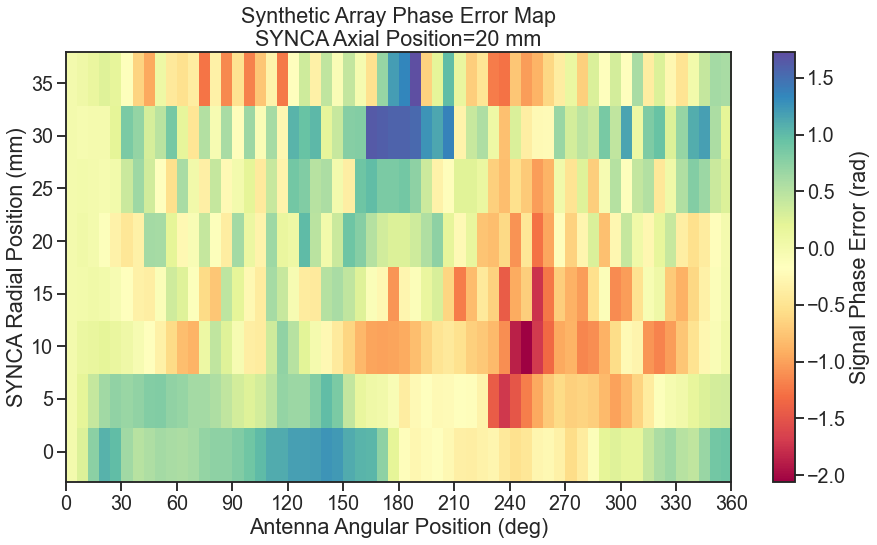

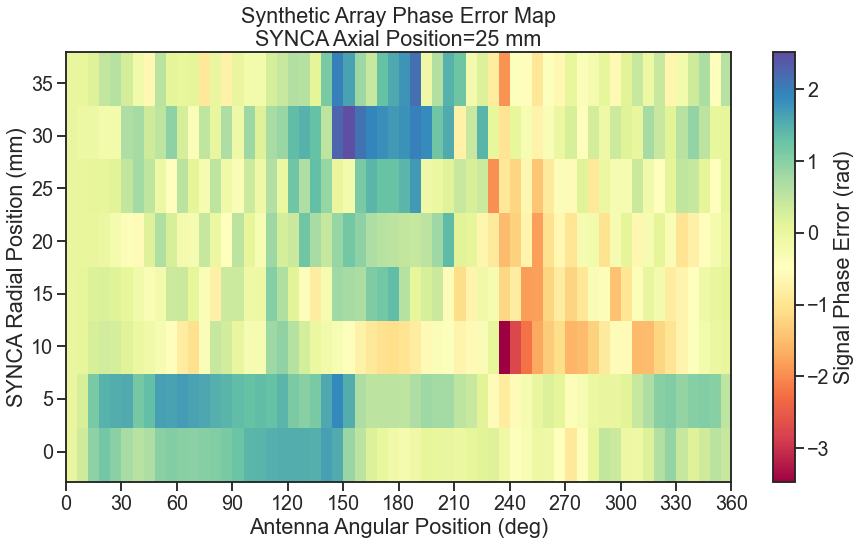

In [57]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(0,30,5)
sns.set_theme(context='talk', style='ticks', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
#cmap = sns.diverging_palette(150,300,as_cmap=True)
cmap = sns.color_palette("Spectral",as_cmap=True)
for j in range(synth_data.shape[0]):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)

    phases = synth_data[j,:,:]
    #phases = phases - phases.mean(axis=-1)[:,np.newaxis]
    #mags = mags - np.mean(mags) # rescale
    #mags = mags - np.mean(mags) # remove DC


    img = ax.imshow(
        np.flip(phases[:, np.arange(0,120,2)],axis=0),
        aspect='auto',
        cmap=cmap,
        extent=(0,360,0,35)
    )
    
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label='Signal Phase Error (rad)')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    ax.set_title('Synthetic Array Phase Error Map'+'\n'+f'SYNCA Axial Position={axii[j]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230120_synth_array_phase_error_map_z{axii[j]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)
    
    
    
    
    

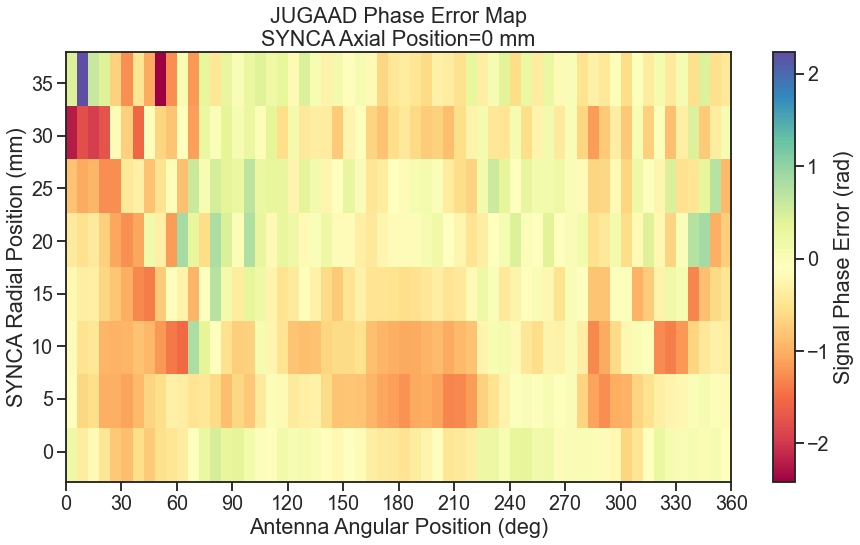

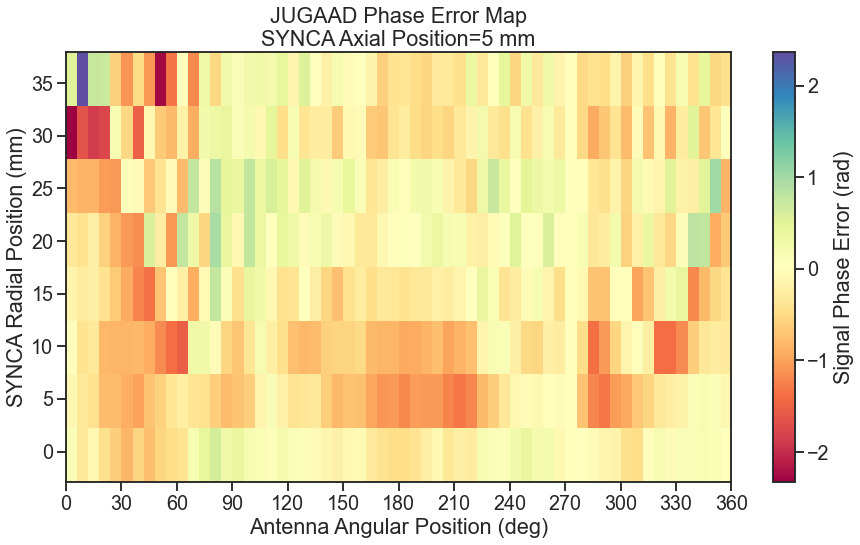

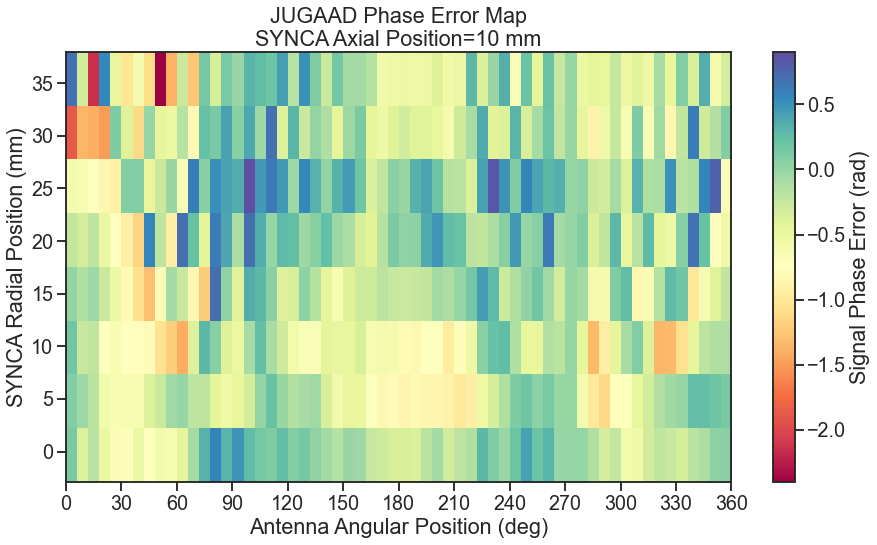

In [168]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(0,30,5)
sns.set_theme(context='talk', style='ticks', font_scale=1.2)
clist = sns.color_palette('deep', n_colors=12)
#cmap = sns.diverging_palette(150,300,as_cmap=True)
cmap = sns.color_palette("Spectral",as_cmap=True)

f_0 = 75
f_range = 10

for j in range(3):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(1,1,1)

    phases = jugaad_data[j,:,f_0,:]
    #phases = jugaad_data[j,:,f_0:f_0+f_range,:].mean(axis=1)
    
    phases = np.roll(phases, -15, axis=-1)
    
    #print(phases.shape)
    #phases = phases - phases.mean(axis=-1)[:,np.newaxis]
    #mags = mags - np.mean(mags) # rescale
    #mags = mags - np.mean(mags) # remove DC


    img = ax.imshow(
        np.flip(phases,axis=0),
        aspect='auto',
        cmap=cmap,
        extent=(0,360,0,35)
    )
    
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label='Signal Phase Error (rad)')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    ax.set_title('JUGAAD Phase Error Map'+'\n'+f'SYNCA Axial Position={axii[j]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230123_jugaad_phase_error_map_z{axii[j]}'
    plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)
    